# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.



>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
from __future__ import division, print_function, absolute_import

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

from sklearn.utils import shuffle
from skimage import exposure

import cv2

import tensorflow as tf

import pickle

import itertools as it

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# verify (X and y) for each of the training, validation, and testing data have identical row size
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_valid))
print(np.shape(y_valid))
print(np.shape(X_test))
print(np.shape(y_test))


(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)
(12630, 32, 32, 3)
(12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of validation examples
n_valid = np.shape(X_valid)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0,:,:,:])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

# training set
y_train_df = pd.DataFrame({'y_train':y_train})
y_train_agg = y_train_df['y_train'].value_counts().sort_index()
# train sample distribution
ts_dist = y_train_agg.values/(n_train/n_classes)*100

# validation set
y_valid_df = pd.DataFrame({'y_valid':y_valid})
y_valid_agg = y_valid_df['y_valid'].value_counts().sort_index()
# valid sample distribution
vs_dist = y_valid_agg.values/(n_valid/n_classes)*100

# test set
y_test_df = pd.DataFrame({'y_test':y_test})
y_test_agg = y_test_df['y_test'].value_counts().sort_index()
# test sample distribution
tes_dist = y_test_agg.values/(n_test/n_classes)*100

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Traffic Sign id: 0
Traffic Sign Label: Speed limit (20km/h)
Traffic Sign 0 Training Sample Count : 180
Traffic Sign 0 Training Sample Distribution : 22.24%


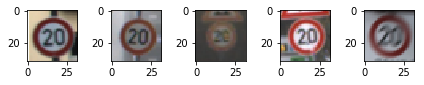

Traffic Sign id: 1
Traffic Sign Label: Speed limit (30km/h)
Traffic Sign 1 Training Sample Count : 1980
Traffic Sign 1 Training Sample Distribution : 244.66%


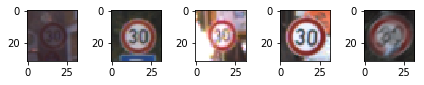

Traffic Sign id: 2
Traffic Sign Label: Speed limit (50km/h)
Traffic Sign 2 Training Sample Count : 2010
Traffic Sign 2 Training Sample Distribution : 248.37%


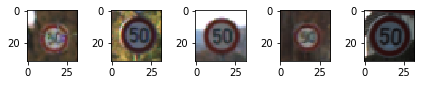

Traffic Sign id: 3
Traffic Sign Label: Speed limit (60km/h)
Traffic Sign 3 Training Sample Count : 1260
Traffic Sign 3 Training Sample Distribution : 155.69%


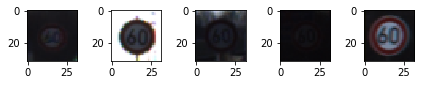

Traffic Sign id: 4
Traffic Sign Label: Speed limit (70km/h)
Traffic Sign 4 Training Sample Count : 1770
Traffic Sign 4 Training Sample Distribution : 218.71%


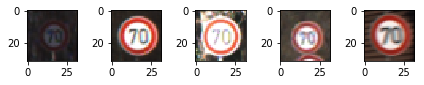

Traffic Sign id: 5
Traffic Sign Label: Speed limit (80km/h)
Traffic Sign 5 Training Sample Count : 1650
Traffic Sign 5 Training Sample Distribution : 203.89%


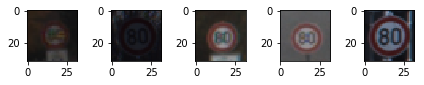

Traffic Sign id: 6
Traffic Sign Label: End of speed limit (80km/h)
Traffic Sign 6 Training Sample Count : 360
Traffic Sign 6 Training Sample Distribution : 44.48%


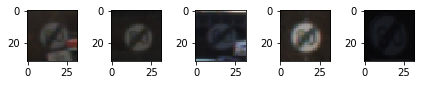

Traffic Sign id: 7
Traffic Sign Label: Speed limit (100km/h)
Traffic Sign 7 Training Sample Count : 1290
Traffic Sign 7 Training Sample Distribution : 159.4%


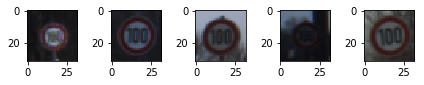

Traffic Sign id: 8
Traffic Sign Label: Speed limit (120km/h)
Traffic Sign 8 Training Sample Count : 1260
Traffic Sign 8 Training Sample Distribution : 155.69%


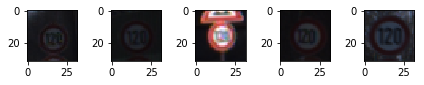

Traffic Sign id: 9
Traffic Sign Label: No passing
Traffic Sign 9 Training Sample Count : 1320
Traffic Sign 9 Training Sample Distribution : 163.11%


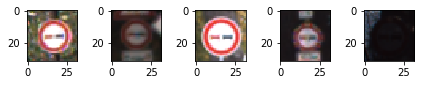

Traffic Sign id: 10
Traffic Sign Label: No passing for vehicles over 3.5 metric tons
Traffic Sign 10 Training Sample Count : 1800
Traffic Sign 10 Training Sample Distribution : 222.42%


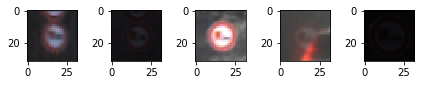

Traffic Sign id: 11
Traffic Sign Label: Right-of-way at the next intersection
Traffic Sign 11 Training Sample Count : 1170
Traffic Sign 11 Training Sample Distribution : 144.57%


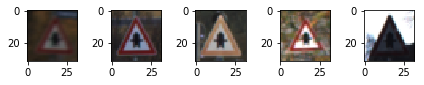

Traffic Sign id: 12
Traffic Sign Label: Priority road
Traffic Sign 12 Training Sample Count : 1890
Traffic Sign 12 Training Sample Distribution : 233.54%


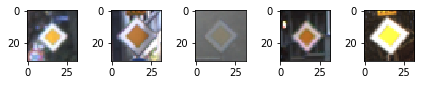

Traffic Sign id: 13
Traffic Sign Label: Yield
Traffic Sign 13 Training Sample Count : 1920
Traffic Sign 13 Training Sample Distribution : 237.25%


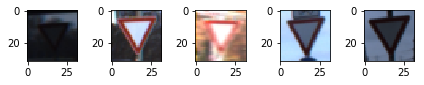

Traffic Sign id: 14
Traffic Sign Label: Stop
Traffic Sign 14 Training Sample Count : 690
Traffic Sign 14 Training Sample Distribution : 85.26%


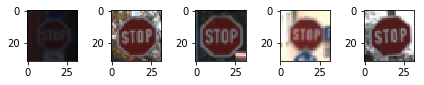

Traffic Sign id: 15
Traffic Sign Label: No vehicles
Traffic Sign 15 Training Sample Count : 540
Traffic Sign 15 Training Sample Distribution : 66.73%


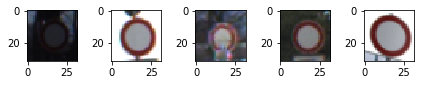

Traffic Sign id: 16
Traffic Sign Label: Vehicles over 3.5 metric tons prohibited
Traffic Sign 16 Training Sample Count : 360
Traffic Sign 16 Training Sample Distribution : 44.48%


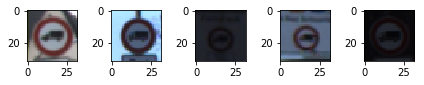

Traffic Sign id: 17
Traffic Sign Label: No entry
Traffic Sign 17 Training Sample Count : 990
Traffic Sign 17 Training Sample Distribution : 122.33%


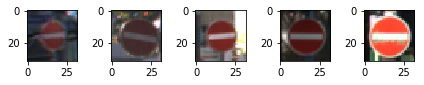

Traffic Sign id: 18
Traffic Sign Label: General caution
Traffic Sign 18 Training Sample Count : 1080
Traffic Sign 18 Training Sample Distribution : 133.45%


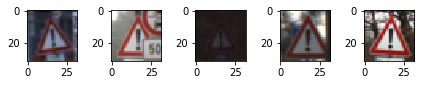

Traffic Sign id: 19
Traffic Sign Label: Dangerous curve to the left
Traffic Sign 19 Training Sample Count : 180
Traffic Sign 19 Training Sample Distribution : 22.24%


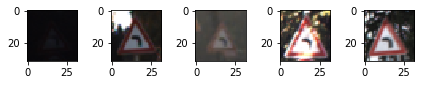

Traffic Sign id: 20
Traffic Sign Label: Dangerous curve to the right
Traffic Sign 20 Training Sample Count : 300
Traffic Sign 20 Training Sample Distribution : 37.07%


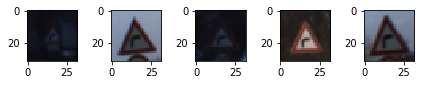

Traffic Sign id: 21
Traffic Sign Label: Double curve
Traffic Sign 21 Training Sample Count : 270
Traffic Sign 21 Training Sample Distribution : 33.36%


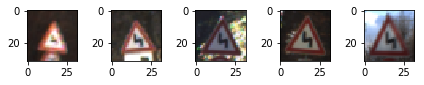

Traffic Sign id: 22
Traffic Sign Label: Bumpy road
Traffic Sign 22 Training Sample Count : 330
Traffic Sign 22 Training Sample Distribution : 40.78%


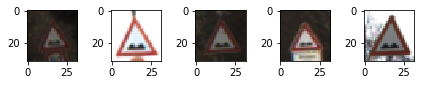

Traffic Sign id: 23
Traffic Sign Label: Slippery road
Traffic Sign 23 Training Sample Count : 450
Traffic Sign 23 Training Sample Distribution : 55.61%


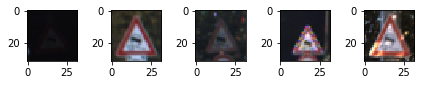

Traffic Sign id: 24
Traffic Sign Label: Road narrows on the right
Traffic Sign 24 Training Sample Count : 240
Traffic Sign 24 Training Sample Distribution : 29.66%


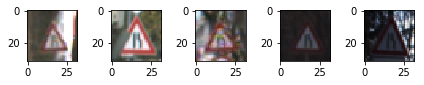

Traffic Sign id: 25
Traffic Sign Label: Road work
Traffic Sign 25 Training Sample Count : 1350
Traffic Sign 25 Training Sample Distribution : 166.82%


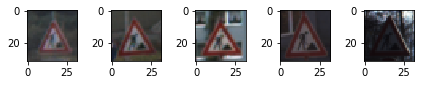

Traffic Sign id: 26
Traffic Sign Label: Traffic signals
Traffic Sign 26 Training Sample Count : 540
Traffic Sign 26 Training Sample Distribution : 66.73%


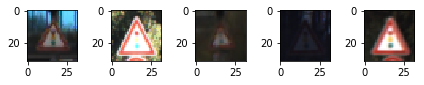

Traffic Sign id: 27
Traffic Sign Label: Pedestrians
Traffic Sign 27 Training Sample Count : 210
Traffic Sign 27 Training Sample Distribution : 25.95%


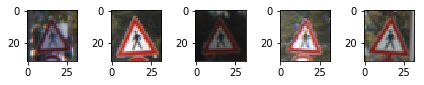

Traffic Sign id: 28
Traffic Sign Label: Children crossing
Traffic Sign 28 Training Sample Count : 480
Traffic Sign 28 Training Sample Distribution : 59.31%


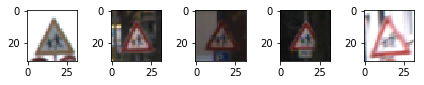

Traffic Sign id: 29
Traffic Sign Label: Bicycles crossing
Traffic Sign 29 Training Sample Count : 240
Traffic Sign 29 Training Sample Distribution : 29.66%


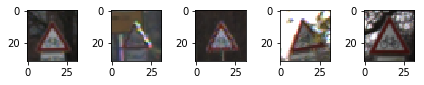

Traffic Sign id: 30
Traffic Sign Label: Beware of ice/snow
Traffic Sign 30 Training Sample Count : 390
Traffic Sign 30 Training Sample Distribution : 48.19%


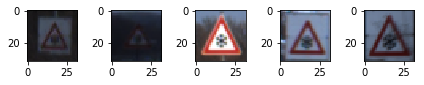

Traffic Sign id: 31
Traffic Sign Label: Wild animals crossing
Traffic Sign 31 Training Sample Count : 690
Traffic Sign 31 Training Sample Distribution : 85.26%


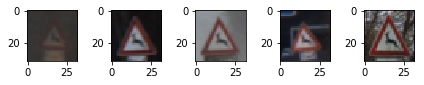

Traffic Sign id: 32
Traffic Sign Label: End of all speed and passing limits
Traffic Sign 32 Training Sample Count : 210
Traffic Sign 32 Training Sample Distribution : 25.95%


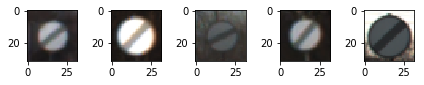

Traffic Sign id: 33
Traffic Sign Label: Turn right ahead
Traffic Sign 33 Training Sample Count : 599
Traffic Sign 33 Training Sample Distribution : 74.02%


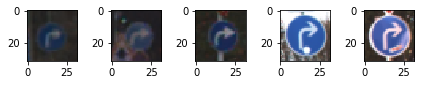

Traffic Sign id: 34
Traffic Sign Label: Turn left ahead
Traffic Sign 34 Training Sample Count : 360
Traffic Sign 34 Training Sample Distribution : 44.48%


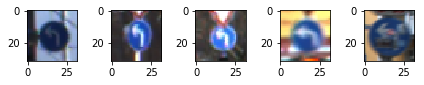

Traffic Sign id: 35
Traffic Sign Label: Ahead only
Traffic Sign 35 Training Sample Count : 1080
Traffic Sign 35 Training Sample Distribution : 133.45%


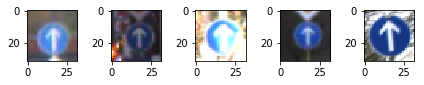

Traffic Sign id: 36
Traffic Sign Label: Go straight or right
Traffic Sign 36 Training Sample Count : 330
Traffic Sign 36 Training Sample Distribution : 40.78%


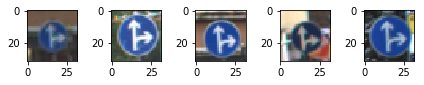

Traffic Sign id: 37
Traffic Sign Label: Go straight or left
Traffic Sign 37 Training Sample Count : 180
Traffic Sign 37 Training Sample Distribution : 22.24%


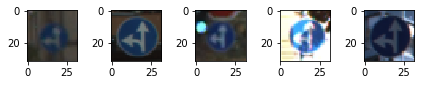

Traffic Sign id: 38
Traffic Sign Label: Keep right
Traffic Sign 38 Training Sample Count : 1860
Traffic Sign 38 Training Sample Distribution : 229.83%


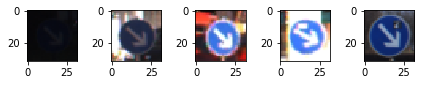

Traffic Sign id: 39
Traffic Sign Label: Keep left
Traffic Sign 39 Training Sample Count : 270
Traffic Sign 39 Training Sample Distribution : 33.36%


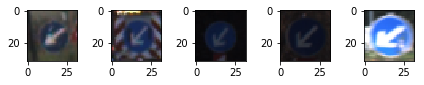

Traffic Sign id: 40
Traffic Sign Label: Roundabout mandatory
Traffic Sign 40 Training Sample Count : 300
Traffic Sign 40 Training Sample Distribution : 37.07%


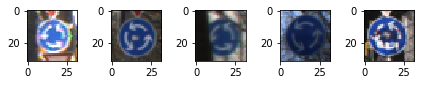

Traffic Sign id: 41
Traffic Sign Label: End of no passing
Traffic Sign 41 Training Sample Count : 210
Traffic Sign 41 Training Sample Distribution : 25.95%


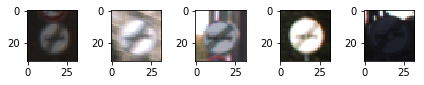

Traffic Sign id: 42
Traffic Sign Label: End of no passing by vehicles over 3.5 metric tons
Traffic Sign 42 Training Sample Count : 210
Traffic Sign 42 Training Sample Distribution : 25.95%


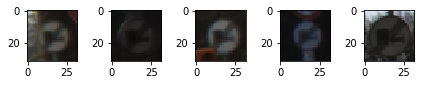

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

yt_df = pd.DataFrame({'y_train':y_train})
yt_df = yt_df.sort_values('y_train')
yt_df['ind_val'] = yt_df.index
yt_df = yt_df.reset_index(drop=True)

sn_df = pd.read_csv('signnames.csv')
sn_vals = sn_df['SignName'].values

ic = 0
while (ic<n_classes):
    
    yt_df_cc = yt_df.loc[yt_df['y_train'] == ic]
    yt_cc = yt_df_cc['ind_val'].values
    yt_cc = sorted(yt_cc)
    yt_cc_len = len(yt_cc)
    yt_cc_l2 = int(np.floor(yt_cc_len/4))
    yt_cc_l3 = int(np.floor(yt_cc_len/2))
    yt_cc_l4 = int(3*np.floor(yt_cc_len/4))
    
    X_train_1 = X_train[yt_cc[0],:,:,:]
    X_train_2 = X_train[yt_cc[yt_cc_l2],:,:,:]
    X_train_3 = X_train[yt_cc[yt_cc_l3],:,:,:]
    X_train_4 = X_train[yt_cc[yt_cc_l4],:,:,:]    
    X_train_5 = X_train[yt_cc[-1],:,:,:]    
    
    print('Traffic Sign id: ' + str(ic))    
    print('Traffic Sign Label: '+sn_vals[ic])
    print('Traffic Sign ' + str(ic) + ' Training Sample Count : ' + str(len(yt_cc)))
    print('Traffic Sign ' + str(ic) + ' Training Sample Distribution : ' + str(round(ts_dist[ic],2)) + '%')
    
    # Display the image
    fig = plt.figure()
    # fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(1,5,1)
    ax1.imshow(X_train_1)
    ax2 = fig.add_subplot(1,5,2)
    ax2.imshow(X_train_2)
    ax3 = fig.add_subplot(1,5,3)
    ax3.imshow(X_train_3)    
    ax4 = fig.add_subplot(1,5,4)
    ax4.imshow(X_train_4)
    ax5 = fig.add_subplot(1,5,5)
    ax5.imshow(X_train_5)
    
    fig.tight_layout()
    plt.show()
    
    ic = ic+1


# print(sn_vals)

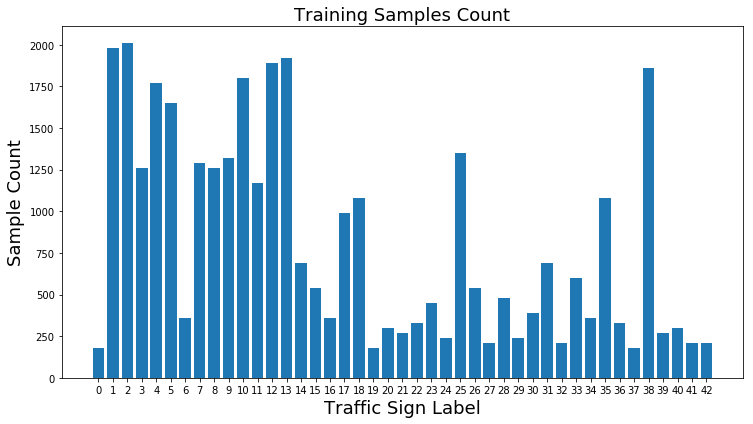

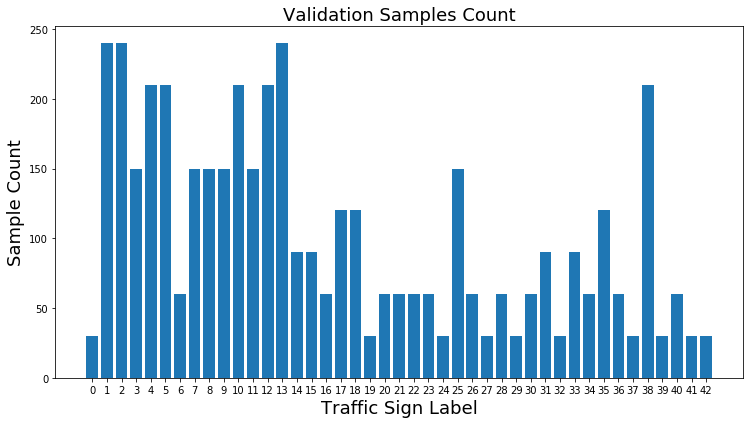

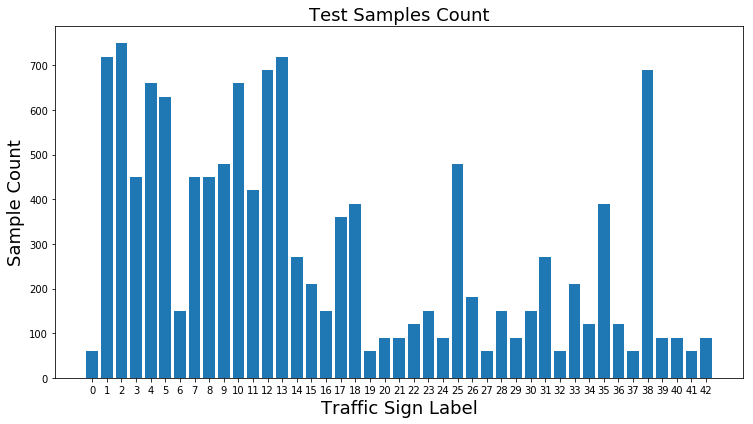

In [5]:
# sample distribution for training, validation, and test sets

# percentage has been calculated as follows (below example is for training set)

# number of training samples: 34799
# number of unique traffic signs/classes: 43
# ideal mean number of training samples per class: 34799/43
# sample distribution: 100*(training samples per class)/(ideal mean number of training samples per class)

p_sf = 1.75
x_pos = np.arange(43)

# training samples 
# plotting
fig = plt.figure()
fig.set_size_inches(18.5/p_sf, 10.5/p_sf)
plt.bar(x_pos, y_train_agg.values, align='center')
plt.xticks(x_pos, x_pos)

plt.xlabel('Traffic Sign Label', fontsize=18)
plt.ylabel('Sample Count', fontsize=18)
plt.title('Training Samples Count', fontsize=18)

fig.tight_layout()
plt.show()

# fig = plt.figure()
# fig.set_size_inches(18.5/p_sf, 10.5/p_sf)
# plt.bar(x_pos, ts_dist, align='center')
# plt.xticks(x_pos, x_pos)

# plt.xlabel('Traffic Sign Label', fontsize=18)
# plt.ylabel('Percent (%)', fontsize=18)
# plt.title('Training Samples Distribution', fontsize=18)

# fig.tight_layout()
# plt.show()

# validation samples 
# plotting
fig = plt.figure()
fig.set_size_inches(18.5/p_sf, 10.5/p_sf)
plt.bar(x_pos, y_valid_agg.values, align='center')
plt.xticks(x_pos, x_pos)

plt.xlabel('Traffic Sign Label', fontsize=18)
plt.ylabel('Sample Count', fontsize=18)
plt.title('Validation Samples Count', fontsize=18)

fig.tight_layout()
plt.show()

# fig = plt.figure()
# fig.set_size_inches(18.5/p_sf, 10.5/p_sf)
# plt.bar(x_pos, vs_dist, align='center')
# plt.xticks(x_pos, x_pos)

# plt.xlabel('Traffic Sign Label', fontsize=18)
# plt.ylabel('Percent (%)', fontsize=18)
# plt.title('Validation Samples Distribution', fontsize=18)

# fig.tight_layout()
# plt.show()

# testing samples 
# plotting
fig = plt.figure()
fig.set_size_inches(18.5/p_sf, 10.5/p_sf)
plt.bar(x_pos, y_test_agg.values, align='center')
plt.xticks(x_pos, x_pos)

plt.xlabel('Traffic Sign Label', fontsize=18)
plt.ylabel('Sample Count', fontsize=18)
plt.title('Test Samples Count', fontsize=18)

fig.tight_layout()
plt.show()

# fig = plt.figure()
# fig.set_size_inches(18.5/p_sf, 10.5/p_sf)
# plt.bar(x_pos, tes_dist, align='center')
# plt.xticks(x_pos, x_pos)

# plt.xlabel('Traffic Sign Label', fontsize=18)
# plt.ylabel('Percent (%)', fontsize=18)
# plt.title('Testing Samples Distribution', fontsize=18)

# fig.tight_layout()
# plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [7]:
# shuffle data to increase randomness
X_train, y_train = shuffle(X_train, y_train)

In [8]:
# convert color to grayscale, improves performance of convnet
# modify low contrast and brigthness images using Contrast Limited Adaptive Histogram Equalization (CLAHE).
# normalize 

# # create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# training data set
Xg_train = np.zeros([n_train,image_shape[0],image_shape[1]])
Xn_train = np.zeros([n_train,image_shape[0],image_shape[1]])
ic = 0

# while (ic<1):
while (ic<n_train):

    Xg_train_cur = cv2.cvtColor(X_train[ic,:,:,:], cv2.COLOR_RGB2GRAY)
    Xg_train_cur = clahe.apply(Xg_train_cur)
    Xn_train[ic,:,:] = np.divide(Xg_train_cur,255)
    
#     # Display the image
#     fig = plt.figure()
#     # fig.set_size_inches(18.5, 10.5)
#     ax1 = fig.add_subplot(1,5,1)
#     ax1.imshow(Xg_train[ic,:,:], cmap="gray")    
#     ax2 = fig.add_subplot(1,5,2)
#     ax2.imshow(X_train[ic,:,:,:])    
    
    ic = ic+1


# validation data set
Xg_valid = np.zeros([n_valid,image_shape[0],image_shape[1]])
Xn_valid = np.zeros([n_valid,image_shape[0],image_shape[1]])
ic = 0

# while (ic<1):
while (ic<n_valid):
    
    Xg_valid_cur = cv2.cvtColor(X_valid[ic,:,:,:], cv2.COLOR_RGB2GRAY)    
    Xg_valid_cur = clahe.apply(Xg_valid_cur)    
    Xn_valid[ic,:,:] = np.divide(Xg_valid_cur,255)
    
#     # Display the image
#     fig = plt.figure()
#     # fig.set_size_inches(18.5, 10.5)
#     ax1 = fig.add_subplot(1,5,1)
#     ax1.imshow(Xg_valid[ic,:,:], cmap="gray")    
#     ax2 = fig.add_subplot(1,5,2)
#     ax2.imshow(X_valid[ic,:,:,:])    
    
    ic = ic+1


# testing data set
Xg_test = np.zeros([n_test,image_shape[0],image_shape[1]])
Xn_test = np.zeros([n_test,image_shape[0],image_shape[1]])
ic = 0

# while (ic<1):
while (ic<n_test):
    
    Xg_test_cur = cv2.cvtColor(X_test[ic,:,:,:], cv2.COLOR_RGB2GRAY)
    Xg_test_cur = clahe.apply(Xg_test_cur)    
    Xn_test[ic,:,:] = np.divide(Xg_test_cur,255)
    
#     # Display the image
#     fig = plt.figure()
#     # fig.set_size_inches(18.5, 10.5)
#     ax1 = fig.add_subplot(1,5,1)
#     ax1.imshow(Xg_test[ic,:,:], cmap="gray")    
#     ax2 = fig.add_subplot(1,5,2)
#     ax2.imshow(X_test[ic,:,:,:])    
    
    ic = ic+1


In [9]:
# Normalize training, validation and testing by mean and variance

# training set
#  mean
X_mu = Xn_train.mean(axis=0)
X_t1 = Xn_train-X_mu
X_t2 = np.square(X_t1)
X_t2 = np.sum(X_t2,axis=0)
# variance
X_sig2 = np.divide(X_t2,X_t1.shape[0])
# Normalized, data set
Xn_train = np.divide(X_t1,X_sig2)

# validation set
X_t1 = Xn_valid-X_mu
# Normalized, data set
Xn_valid = np.divide(X_t1,X_sig2)

# test set
X_t1 = Xn_test-X_mu
# Normalized, data set
Xn_test = np.divide(X_t1,X_sig2)


### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [11]:
# Training Parameters
learning_rate = 0.001
num_steps = 4500
batch_size = 125

# Network Parameters
num_input = image_shape[0]*image_shape[1] # traffic sign image shape/size input (img shape: 32*32)
num_classes = n_classes # German Traffic Sign total classes (0-42 digits)
dropout = 0.5 # Dropout, probability to drop a unit


In [12]:
# Create the neural network
def conv_net(x_in, n_classes, dropout, reuse, is_training):
    
    # Define a scope for reusing the variables
    with tf.variable_scope('ConvNet', reuse=reuse):
        # TF Estimator input is a dict, in case of multiple inputs
        x = x_in['img_nd']

        # German Traffic Sign data input is a 1-D vector of 1024 features (32*32 pixels)
        # Reshape to match picture format [Height x Width x Channel]
        # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
        x = tf.reshape(x, shape=[-1, 32, 32, 1])

        # Convolution Layer with 32 filters and a kernel size of 5
        conv1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv1 = tf.layers.max_pooling2d(conv1, 2, 2)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv1_bo = tf.layers.max_pooling2d(conv1, 4, 4)        
        # Flatten the data to a 1-D vector for the fully connected layer
        shape = conv1_bo.get_shape().as_list()
        f1_c1 = tf.reshape(conv1_bo, [-1, shape[1] * shape[2]  * shape[3]])
        
        # Convolution Layer with 64 filters and a kernel size of 5
        conv2 = tf.layers.conv2d(conv1, 64, 5, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv2 = tf.layers.max_pooling2d(conv2, 2, 2)
        # Flatten the data to a 1-D vector for the fully connected layer
        shape = conv2.get_shape().as_list()        
        f1_c2 = tf.reshape(conv2, [-1, shape[1] * shape[2] * shape[3]])
                
        # Combine Flatten datas to a 1-D vector for the fully connected layer
        fcl_0 = tf.concat(values=[f1_c1, f1_c2], axis=-1)

        # Fully connected layer 1
        fc1_1 = tf.layers.dense(fcl_0, 1024, activation=tf.nn.relu)
        
        # Apply Dropout (if is_training is False, dropout is not applied)
        fc1_out = tf.layers.dropout(fc1_1, rate=0.5, training=is_training)

        # Output layer, class prediction
        out = tf.layers.dense(fc1_out, n_classes)

    return out

In [13]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    
    # Build the neural network
    # Because Dropout have different behavior at training and prediction time, we
    # need to create 2 distinct computation graphs that still share the same weights.
    logits_train = conv_net(features, num_classes, dropout, reuse=False, is_training=True)
    logits_test = conv_net(features, num_classes, dropout, reuse=True, is_training=False)

    pred_classes = tf.argmax(input=logits_test, axis=1)
    pred_class_v1 = tf.cast(pred_classes, tf.float32)
    pred_class_v2 = tf.Variable(np.zeros(np.shape(pred_class_v1)), dtype=tf.float32)
    
    pred_probas = tf.nn.softmax(logits_test)
    [probs_top5_v1, probs_top5_ids] = tf.nn.top_k(pred_probas, k=5)    
    probs_top5_v2 = tf.Variable(np.zeros(np.shape(probs_top5_v1)), dtype=tf.float32)
    probs_top5i_v2 = tf.Variable(np.zeros(np.shape(probs_top5_ids)), dtype=tf.int32)

    # Predictions
    predictions = {
    "classes": tf.assign(pred_class_v2,pred_class_v1, name="class_tensor"),
    "probabilities": tf.assign(probs_top5_v2,probs_top5_v1, name="softmax_tensor"),
    "probs_ids": tf.assign(probs_top5i_v2,probs_top5_ids, name="st_ids")}

    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=predictions)    
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits_train, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
            
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
#       predictions=pred_classes,
      predictions=predictions,        
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})
    
    return estim_specs


In [14]:
# Build the Estimator
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp6d9_ifq9', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [16]:
# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(x = {'img_nd': np.float32(Xn_train)}, 
                                              y = np.float32(y_train), 
                                              batch_size=batch_size, num_epochs=None, shuffle=True)

# Train the Model
estim_specs_train = model.train(input_fn, steps=num_steps)


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp6d9_ifq9/model.ckpt.
INFO:tensorflow:loss = 5.37276, step = 1
INFO:tensorflow:global_step/sec: 67.3199
INFO:tensorflow:loss = 0.727027, step = 101 (1.487 sec)
INFO:tensorflow:global_step/sec: 75.8393
INFO:tensorflow:loss = 0.315217, step = 201 (1.319 sec)
INFO:tensorflow:global_step/sec: 76.0982
INFO:tensorflow:loss = 0.188565, step = 301 (1.314 sec)
INFO:tensorflow:global_step/sec: 75.753
INFO:tensorflow:loss = 0.226102, step = 401 (1.320 sec)
INFO:tensorflow:global_step/sec: 76.0151
INFO:tensorflow:loss = 0.184082, step = 501 (1.315 sec)
INFO:tensorflow:global_step/sec: 75.8017
INFO:tensorflow:loss = 0.139425, step = 601 (1.319 sec)
INFO:tensorflow:global_step/sec: 75.9873
INFO:tensorflow:loss = 0.0925796, step = 701 (1.316 sec)
INFO:tensorflow:global_step/sec: 75.633
INFO:tensorflow:loss = 0.067357, step = 801 (1.322 sec)
INFO:tensorflow:global_step/sec: 75.652
INFO:tensorflow:loss = 0.

In [17]:
# Define the input function for validation
input_fn = tf.estimator.inputs.numpy_input_fn(x = {'img_nd': np.float32(Xn_valid)}, 
                                              y = np.float32(y_valid), 
                                              batch_size=batch_size, num_epochs=None, shuffle=True)

# Evaluate the Model
estim_specs_valid = model.evaluate(input_fn, steps=num_steps)

INFO:tensorflow:Starting evaluation at 2019-05-27-13:51:50
INFO:tensorflow:Restoring parameters from /tmp/tmp6d9_ifq9/model.ckpt-4500
INFO:tensorflow:Evaluation [1/4500]
INFO:tensorflow:Evaluation [2/4500]
INFO:tensorflow:Evaluation [3/4500]
INFO:tensorflow:Evaluation [4/4500]
INFO:tensorflow:Evaluation [5/4500]
INFO:tensorflow:Evaluation [6/4500]
INFO:tensorflow:Evaluation [7/4500]
INFO:tensorflow:Evaluation [8/4500]
INFO:tensorflow:Evaluation [9/4500]
INFO:tensorflow:Evaluation [10/4500]
INFO:tensorflow:Evaluation [11/4500]
INFO:tensorflow:Evaluation [12/4500]
INFO:tensorflow:Evaluation [13/4500]
INFO:tensorflow:Evaluation [14/4500]
INFO:tensorflow:Evaluation [15/4500]
INFO:tensorflow:Evaluation [16/4500]
INFO:tensorflow:Evaluation [17/4500]
INFO:tensorflow:Evaluation [18/4500]
INFO:tensorflow:Evaluation [19/4500]
INFO:tensorflow:Evaluation [20/4500]
INFO:tensorflow:Evaluation [21/4500]
INFO:tensorflow:Evaluation [22/4500]
INFO:tensorflow:Evaluation [23/4500]
INFO:tensorflow:Evaluati

INFO:tensorflow:Evaluation [216/4500]
INFO:tensorflow:Evaluation [217/4500]
INFO:tensorflow:Evaluation [218/4500]
INFO:tensorflow:Evaluation [219/4500]
INFO:tensorflow:Evaluation [220/4500]
INFO:tensorflow:Evaluation [221/4500]
INFO:tensorflow:Evaluation [222/4500]
INFO:tensorflow:Evaluation [223/4500]
INFO:tensorflow:Evaluation [224/4500]
INFO:tensorflow:Evaluation [225/4500]
INFO:tensorflow:Evaluation [226/4500]
INFO:tensorflow:Evaluation [227/4500]
INFO:tensorflow:Evaluation [228/4500]
INFO:tensorflow:Evaluation [229/4500]
INFO:tensorflow:Evaluation [230/4500]
INFO:tensorflow:Evaluation [231/4500]
INFO:tensorflow:Evaluation [232/4500]
INFO:tensorflow:Evaluation [233/4500]
INFO:tensorflow:Evaluation [234/4500]
INFO:tensorflow:Evaluation [235/4500]
INFO:tensorflow:Evaluation [236/4500]
INFO:tensorflow:Evaluation [237/4500]
INFO:tensorflow:Evaluation [238/4500]
INFO:tensorflow:Evaluation [239/4500]
INFO:tensorflow:Evaluation [240/4500]
INFO:tensorflow:Evaluation [241/4500]
INFO:tensorf

INFO:tensorflow:Evaluation [432/4500]
INFO:tensorflow:Evaluation [433/4500]
INFO:tensorflow:Evaluation [434/4500]
INFO:tensorflow:Evaluation [435/4500]
INFO:tensorflow:Evaluation [436/4500]
INFO:tensorflow:Evaluation [437/4500]
INFO:tensorflow:Evaluation [438/4500]
INFO:tensorflow:Evaluation [439/4500]
INFO:tensorflow:Evaluation [440/4500]
INFO:tensorflow:Evaluation [441/4500]
INFO:tensorflow:Evaluation [442/4500]
INFO:tensorflow:Evaluation [443/4500]
INFO:tensorflow:Evaluation [444/4500]
INFO:tensorflow:Evaluation [445/4500]
INFO:tensorflow:Evaluation [446/4500]
INFO:tensorflow:Evaluation [447/4500]
INFO:tensorflow:Evaluation [448/4500]
INFO:tensorflow:Evaluation [449/4500]
INFO:tensorflow:Evaluation [450/4500]
INFO:tensorflow:Evaluation [451/4500]
INFO:tensorflow:Evaluation [452/4500]
INFO:tensorflow:Evaluation [453/4500]
INFO:tensorflow:Evaluation [454/4500]
INFO:tensorflow:Evaluation [455/4500]
INFO:tensorflow:Evaluation [456/4500]
INFO:tensorflow:Evaluation [457/4500]
INFO:tensorf

INFO:tensorflow:Evaluation [648/4500]
INFO:tensorflow:Evaluation [649/4500]
INFO:tensorflow:Evaluation [650/4500]
INFO:tensorflow:Evaluation [651/4500]
INFO:tensorflow:Evaluation [652/4500]
INFO:tensorflow:Evaluation [653/4500]
INFO:tensorflow:Evaluation [654/4500]
INFO:tensorflow:Evaluation [655/4500]
INFO:tensorflow:Evaluation [656/4500]
INFO:tensorflow:Evaluation [657/4500]
INFO:tensorflow:Evaluation [658/4500]
INFO:tensorflow:Evaluation [659/4500]
INFO:tensorflow:Evaluation [660/4500]
INFO:tensorflow:Evaluation [661/4500]
INFO:tensorflow:Evaluation [662/4500]
INFO:tensorflow:Evaluation [663/4500]
INFO:tensorflow:Evaluation [664/4500]
INFO:tensorflow:Evaluation [665/4500]
INFO:tensorflow:Evaluation [666/4500]
INFO:tensorflow:Evaluation [667/4500]
INFO:tensorflow:Evaluation [668/4500]
INFO:tensorflow:Evaluation [669/4500]
INFO:tensorflow:Evaluation [670/4500]
INFO:tensorflow:Evaluation [671/4500]
INFO:tensorflow:Evaluation [672/4500]
INFO:tensorflow:Evaluation [673/4500]
INFO:tensorf

INFO:tensorflow:Evaluation [864/4500]
INFO:tensorflow:Evaluation [865/4500]
INFO:tensorflow:Evaluation [866/4500]
INFO:tensorflow:Evaluation [867/4500]
INFO:tensorflow:Evaluation [868/4500]
INFO:tensorflow:Evaluation [869/4500]
INFO:tensorflow:Evaluation [870/4500]
INFO:tensorflow:Evaluation [871/4500]
INFO:tensorflow:Evaluation [872/4500]
INFO:tensorflow:Evaluation [873/4500]
INFO:tensorflow:Evaluation [874/4500]
INFO:tensorflow:Evaluation [875/4500]
INFO:tensorflow:Evaluation [876/4500]
INFO:tensorflow:Evaluation [877/4500]
INFO:tensorflow:Evaluation [878/4500]
INFO:tensorflow:Evaluation [879/4500]
INFO:tensorflow:Evaluation [880/4500]
INFO:tensorflow:Evaluation [881/4500]
INFO:tensorflow:Evaluation [882/4500]
INFO:tensorflow:Evaluation [883/4500]
INFO:tensorflow:Evaluation [884/4500]
INFO:tensorflow:Evaluation [885/4500]
INFO:tensorflow:Evaluation [886/4500]
INFO:tensorflow:Evaluation [887/4500]
INFO:tensorflow:Evaluation [888/4500]
INFO:tensorflow:Evaluation [889/4500]
INFO:tensorf

INFO:tensorflow:Evaluation [1078/4500]
INFO:tensorflow:Evaluation [1079/4500]
INFO:tensorflow:Evaluation [1080/4500]
INFO:tensorflow:Evaluation [1081/4500]
INFO:tensorflow:Evaluation [1082/4500]
INFO:tensorflow:Evaluation [1083/4500]
INFO:tensorflow:Evaluation [1084/4500]
INFO:tensorflow:Evaluation [1085/4500]
INFO:tensorflow:Evaluation [1086/4500]
INFO:tensorflow:Evaluation [1087/4500]
INFO:tensorflow:Evaluation [1088/4500]
INFO:tensorflow:Evaluation [1089/4500]
INFO:tensorflow:Evaluation [1090/4500]
INFO:tensorflow:Evaluation [1091/4500]
INFO:tensorflow:Evaluation [1092/4500]
INFO:tensorflow:Evaluation [1093/4500]
INFO:tensorflow:Evaluation [1094/4500]
INFO:tensorflow:Evaluation [1095/4500]
INFO:tensorflow:Evaluation [1096/4500]
INFO:tensorflow:Evaluation [1097/4500]
INFO:tensorflow:Evaluation [1098/4500]
INFO:tensorflow:Evaluation [1099/4500]
INFO:tensorflow:Evaluation [1100/4500]
INFO:tensorflow:Evaluation [1101/4500]
INFO:tensorflow:Evaluation [1102/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1289/4500]
INFO:tensorflow:Evaluation [1290/4500]
INFO:tensorflow:Evaluation [1291/4500]
INFO:tensorflow:Evaluation [1292/4500]
INFO:tensorflow:Evaluation [1293/4500]
INFO:tensorflow:Evaluation [1294/4500]
INFO:tensorflow:Evaluation [1295/4500]
INFO:tensorflow:Evaluation [1296/4500]
INFO:tensorflow:Evaluation [1297/4500]
INFO:tensorflow:Evaluation [1298/4500]
INFO:tensorflow:Evaluation [1299/4500]
INFO:tensorflow:Evaluation [1300/4500]
INFO:tensorflow:Evaluation [1301/4500]
INFO:tensorflow:Evaluation [1302/4500]
INFO:tensorflow:Evaluation [1303/4500]
INFO:tensorflow:Evaluation [1304/4500]
INFO:tensorflow:Evaluation [1305/4500]
INFO:tensorflow:Evaluation [1306/4500]
INFO:tensorflow:Evaluation [1307/4500]
INFO:tensorflow:Evaluation [1308/4500]
INFO:tensorflow:Evaluation [1309/4500]
INFO:tensorflow:Evaluation [1310/4500]
INFO:tensorflow:Evaluation [1311/4500]
INFO:tensorflow:Evaluation [1312/4500]
INFO:tensorflow:Evaluation [1313/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1500/4500]
INFO:tensorflow:Evaluation [1501/4500]
INFO:tensorflow:Evaluation [1502/4500]
INFO:tensorflow:Evaluation [1503/4500]
INFO:tensorflow:Evaluation [1504/4500]
INFO:tensorflow:Evaluation [1505/4500]
INFO:tensorflow:Evaluation [1506/4500]
INFO:tensorflow:Evaluation [1507/4500]
INFO:tensorflow:Evaluation [1508/4500]
INFO:tensorflow:Evaluation [1509/4500]
INFO:tensorflow:Evaluation [1510/4500]
INFO:tensorflow:Evaluation [1511/4500]
INFO:tensorflow:Evaluation [1512/4500]
INFO:tensorflow:Evaluation [1513/4500]
INFO:tensorflow:Evaluation [1514/4500]
INFO:tensorflow:Evaluation [1515/4500]
INFO:tensorflow:Evaluation [1516/4500]
INFO:tensorflow:Evaluation [1517/4500]
INFO:tensorflow:Evaluation [1518/4500]
INFO:tensorflow:Evaluation [1519/4500]
INFO:tensorflow:Evaluation [1520/4500]
INFO:tensorflow:Evaluation [1521/4500]
INFO:tensorflow:Evaluation [1522/4500]
INFO:tensorflow:Evaluation [1523/4500]
INFO:tensorflow:Evaluation [1524/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1711/4500]
INFO:tensorflow:Evaluation [1712/4500]
INFO:tensorflow:Evaluation [1713/4500]
INFO:tensorflow:Evaluation [1714/4500]
INFO:tensorflow:Evaluation [1715/4500]
INFO:tensorflow:Evaluation [1716/4500]
INFO:tensorflow:Evaluation [1717/4500]
INFO:tensorflow:Evaluation [1718/4500]
INFO:tensorflow:Evaluation [1719/4500]
INFO:tensorflow:Evaluation [1720/4500]
INFO:tensorflow:Evaluation [1721/4500]
INFO:tensorflow:Evaluation [1722/4500]
INFO:tensorflow:Evaluation [1723/4500]
INFO:tensorflow:Evaluation [1724/4500]
INFO:tensorflow:Evaluation [1725/4500]
INFO:tensorflow:Evaluation [1726/4500]
INFO:tensorflow:Evaluation [1727/4500]
INFO:tensorflow:Evaluation [1728/4500]
INFO:tensorflow:Evaluation [1729/4500]
INFO:tensorflow:Evaluation [1730/4500]
INFO:tensorflow:Evaluation [1731/4500]
INFO:tensorflow:Evaluation [1732/4500]
INFO:tensorflow:Evaluation [1733/4500]
INFO:tensorflow:Evaluation [1734/4500]
INFO:tensorflow:Evaluation [1735/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1922/4500]
INFO:tensorflow:Evaluation [1923/4500]
INFO:tensorflow:Evaluation [1924/4500]
INFO:tensorflow:Evaluation [1925/4500]
INFO:tensorflow:Evaluation [1926/4500]
INFO:tensorflow:Evaluation [1927/4500]
INFO:tensorflow:Evaluation [1928/4500]
INFO:tensorflow:Evaluation [1929/4500]
INFO:tensorflow:Evaluation [1930/4500]
INFO:tensorflow:Evaluation [1931/4500]
INFO:tensorflow:Evaluation [1932/4500]
INFO:tensorflow:Evaluation [1933/4500]
INFO:tensorflow:Evaluation [1934/4500]
INFO:tensorflow:Evaluation [1935/4500]
INFO:tensorflow:Evaluation [1936/4500]
INFO:tensorflow:Evaluation [1937/4500]
INFO:tensorflow:Evaluation [1938/4500]
INFO:tensorflow:Evaluation [1939/4500]
INFO:tensorflow:Evaluation [1940/4500]
INFO:tensorflow:Evaluation [1941/4500]
INFO:tensorflow:Evaluation [1942/4500]
INFO:tensorflow:Evaluation [1943/4500]
INFO:tensorflow:Evaluation [1944/4500]
INFO:tensorflow:Evaluation [1945/4500]
INFO:tensorflow:Evaluation [1946/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [2133/4500]
INFO:tensorflow:Evaluation [2134/4500]
INFO:tensorflow:Evaluation [2135/4500]
INFO:tensorflow:Evaluation [2136/4500]
INFO:tensorflow:Evaluation [2137/4500]
INFO:tensorflow:Evaluation [2138/4500]
INFO:tensorflow:Evaluation [2139/4500]
INFO:tensorflow:Evaluation [2140/4500]
INFO:tensorflow:Evaluation [2141/4500]
INFO:tensorflow:Evaluation [2142/4500]
INFO:tensorflow:Evaluation [2143/4500]
INFO:tensorflow:Evaluation [2144/4500]
INFO:tensorflow:Evaluation [2145/4500]
INFO:tensorflow:Evaluation [2146/4500]
INFO:tensorflow:Evaluation [2147/4500]
INFO:tensorflow:Evaluation [2148/4500]
INFO:tensorflow:Evaluation [2149/4500]
INFO:tensorflow:Evaluation [2150/4500]
INFO:tensorflow:Evaluation [2151/4500]
INFO:tensorflow:Evaluation [2152/4500]
INFO:tensorflow:Evaluation [2153/4500]
INFO:tensorflow:Evaluation [2154/4500]
INFO:tensorflow:Evaluation [2155/4500]
INFO:tensorflow:Evaluation [2156/4500]
INFO:tensorflow:Evaluation [2157/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [2344/4500]
INFO:tensorflow:Evaluation [2345/4500]
INFO:tensorflow:Evaluation [2346/4500]
INFO:tensorflow:Evaluation [2347/4500]
INFO:tensorflow:Evaluation [2348/4500]
INFO:tensorflow:Evaluation [2349/4500]
INFO:tensorflow:Evaluation [2350/4500]
INFO:tensorflow:Evaluation [2351/4500]
INFO:tensorflow:Evaluation [2352/4500]
INFO:tensorflow:Evaluation [2353/4500]
INFO:tensorflow:Evaluation [2354/4500]
INFO:tensorflow:Evaluation [2355/4500]
INFO:tensorflow:Evaluation [2356/4500]
INFO:tensorflow:Evaluation [2357/4500]
INFO:tensorflow:Evaluation [2358/4500]
INFO:tensorflow:Evaluation [2359/4500]
INFO:tensorflow:Evaluation [2360/4500]
INFO:tensorflow:Evaluation [2361/4500]
INFO:tensorflow:Evaluation [2362/4500]
INFO:tensorflow:Evaluation [2363/4500]
INFO:tensorflow:Evaluation [2364/4500]
INFO:tensorflow:Evaluation [2365/4500]
INFO:tensorflow:Evaluation [2366/4500]
INFO:tensorflow:Evaluation [2367/4500]
INFO:tensorflow:Evaluation [2368/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [2555/4500]
INFO:tensorflow:Evaluation [2556/4500]
INFO:tensorflow:Evaluation [2557/4500]
INFO:tensorflow:Evaluation [2558/4500]
INFO:tensorflow:Evaluation [2559/4500]
INFO:tensorflow:Evaluation [2560/4500]
INFO:tensorflow:Evaluation [2561/4500]
INFO:tensorflow:Evaluation [2562/4500]
INFO:tensorflow:Evaluation [2563/4500]
INFO:tensorflow:Evaluation [2564/4500]
INFO:tensorflow:Evaluation [2565/4500]
INFO:tensorflow:Evaluation [2566/4500]
INFO:tensorflow:Evaluation [2567/4500]
INFO:tensorflow:Evaluation [2568/4500]
INFO:tensorflow:Evaluation [2569/4500]
INFO:tensorflow:Evaluation [2570/4500]
INFO:tensorflow:Evaluation [2571/4500]
INFO:tensorflow:Evaluation [2572/4500]
INFO:tensorflow:Evaluation [2573/4500]
INFO:tensorflow:Evaluation [2574/4500]
INFO:tensorflow:Evaluation [2575/4500]
INFO:tensorflow:Evaluation [2576/4500]
INFO:tensorflow:Evaluation [2577/4500]
INFO:tensorflow:Evaluation [2578/4500]
INFO:tensorflow:Evaluation [2579/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [2766/4500]
INFO:tensorflow:Evaluation [2767/4500]
INFO:tensorflow:Evaluation [2768/4500]
INFO:tensorflow:Evaluation [2769/4500]
INFO:tensorflow:Evaluation [2770/4500]
INFO:tensorflow:Evaluation [2771/4500]
INFO:tensorflow:Evaluation [2772/4500]
INFO:tensorflow:Evaluation [2773/4500]
INFO:tensorflow:Evaluation [2774/4500]
INFO:tensorflow:Evaluation [2775/4500]
INFO:tensorflow:Evaluation [2776/4500]
INFO:tensorflow:Evaluation [2777/4500]
INFO:tensorflow:Evaluation [2778/4500]
INFO:tensorflow:Evaluation [2779/4500]
INFO:tensorflow:Evaluation [2780/4500]
INFO:tensorflow:Evaluation [2781/4500]
INFO:tensorflow:Evaluation [2782/4500]
INFO:tensorflow:Evaluation [2783/4500]
INFO:tensorflow:Evaluation [2784/4500]
INFO:tensorflow:Evaluation [2785/4500]
INFO:tensorflow:Evaluation [2786/4500]
INFO:tensorflow:Evaluation [2787/4500]
INFO:tensorflow:Evaluation [2788/4500]
INFO:tensorflow:Evaluation [2789/4500]
INFO:tensorflow:Evaluation [2790/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [2977/4500]
INFO:tensorflow:Evaluation [2978/4500]
INFO:tensorflow:Evaluation [2979/4500]
INFO:tensorflow:Evaluation [2980/4500]
INFO:tensorflow:Evaluation [2981/4500]
INFO:tensorflow:Evaluation [2982/4500]
INFO:tensorflow:Evaluation [2983/4500]
INFO:tensorflow:Evaluation [2984/4500]
INFO:tensorflow:Evaluation [2985/4500]
INFO:tensorflow:Evaluation [2986/4500]
INFO:tensorflow:Evaluation [2987/4500]
INFO:tensorflow:Evaluation [2988/4500]
INFO:tensorflow:Evaluation [2989/4500]
INFO:tensorflow:Evaluation [2990/4500]
INFO:tensorflow:Evaluation [2991/4500]
INFO:tensorflow:Evaluation [2992/4500]
INFO:tensorflow:Evaluation [2993/4500]
INFO:tensorflow:Evaluation [2994/4500]
INFO:tensorflow:Evaluation [2995/4500]
INFO:tensorflow:Evaluation [2996/4500]
INFO:tensorflow:Evaluation [2997/4500]
INFO:tensorflow:Evaluation [2998/4500]
INFO:tensorflow:Evaluation [2999/4500]
INFO:tensorflow:Evaluation [3000/4500]
INFO:tensorflow:Evaluation [3001/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [3188/4500]
INFO:tensorflow:Evaluation [3189/4500]
INFO:tensorflow:Evaluation [3190/4500]
INFO:tensorflow:Evaluation [3191/4500]
INFO:tensorflow:Evaluation [3192/4500]
INFO:tensorflow:Evaluation [3193/4500]
INFO:tensorflow:Evaluation [3194/4500]
INFO:tensorflow:Evaluation [3195/4500]
INFO:tensorflow:Evaluation [3196/4500]
INFO:tensorflow:Evaluation [3197/4500]
INFO:tensorflow:Evaluation [3198/4500]
INFO:tensorflow:Evaluation [3199/4500]
INFO:tensorflow:Evaluation [3200/4500]
INFO:tensorflow:Evaluation [3201/4500]
INFO:tensorflow:Evaluation [3202/4500]
INFO:tensorflow:Evaluation [3203/4500]
INFO:tensorflow:Evaluation [3204/4500]
INFO:tensorflow:Evaluation [3205/4500]
INFO:tensorflow:Evaluation [3206/4500]
INFO:tensorflow:Evaluation [3207/4500]
INFO:tensorflow:Evaluation [3208/4500]
INFO:tensorflow:Evaluation [3209/4500]
INFO:tensorflow:Evaluation [3210/4500]
INFO:tensorflow:Evaluation [3211/4500]
INFO:tensorflow:Evaluation [3212/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [3399/4500]
INFO:tensorflow:Evaluation [3400/4500]
INFO:tensorflow:Evaluation [3401/4500]
INFO:tensorflow:Evaluation [3402/4500]
INFO:tensorflow:Evaluation [3403/4500]
INFO:tensorflow:Evaluation [3404/4500]
INFO:tensorflow:Evaluation [3405/4500]
INFO:tensorflow:Evaluation [3406/4500]
INFO:tensorflow:Evaluation [3407/4500]
INFO:tensorflow:Evaluation [3408/4500]
INFO:tensorflow:Evaluation [3409/4500]
INFO:tensorflow:Evaluation [3410/4500]
INFO:tensorflow:Evaluation [3411/4500]
INFO:tensorflow:Evaluation [3412/4500]
INFO:tensorflow:Evaluation [3413/4500]
INFO:tensorflow:Evaluation [3414/4500]
INFO:tensorflow:Evaluation [3415/4500]
INFO:tensorflow:Evaluation [3416/4500]
INFO:tensorflow:Evaluation [3417/4500]
INFO:tensorflow:Evaluation [3418/4500]
INFO:tensorflow:Evaluation [3419/4500]
INFO:tensorflow:Evaluation [3420/4500]
INFO:tensorflow:Evaluation [3421/4500]
INFO:tensorflow:Evaluation [3422/4500]
INFO:tensorflow:Evaluation [3423/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [3610/4500]
INFO:tensorflow:Evaluation [3611/4500]
INFO:tensorflow:Evaluation [3612/4500]
INFO:tensorflow:Evaluation [3613/4500]
INFO:tensorflow:Evaluation [3614/4500]
INFO:tensorflow:Evaluation [3615/4500]
INFO:tensorflow:Evaluation [3616/4500]
INFO:tensorflow:Evaluation [3617/4500]
INFO:tensorflow:Evaluation [3618/4500]
INFO:tensorflow:Evaluation [3619/4500]
INFO:tensorflow:Evaluation [3620/4500]
INFO:tensorflow:Evaluation [3621/4500]
INFO:tensorflow:Evaluation [3622/4500]
INFO:tensorflow:Evaluation [3623/4500]
INFO:tensorflow:Evaluation [3624/4500]
INFO:tensorflow:Evaluation [3625/4500]
INFO:tensorflow:Evaluation [3626/4500]
INFO:tensorflow:Evaluation [3627/4500]
INFO:tensorflow:Evaluation [3628/4500]
INFO:tensorflow:Evaluation [3629/4500]
INFO:tensorflow:Evaluation [3630/4500]
INFO:tensorflow:Evaluation [3631/4500]
INFO:tensorflow:Evaluation [3632/4500]
INFO:tensorflow:Evaluation [3633/4500]
INFO:tensorflow:Evaluation [3634/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [3821/4500]
INFO:tensorflow:Evaluation [3822/4500]
INFO:tensorflow:Evaluation [3823/4500]
INFO:tensorflow:Evaluation [3824/4500]
INFO:tensorflow:Evaluation [3825/4500]
INFO:tensorflow:Evaluation [3826/4500]
INFO:tensorflow:Evaluation [3827/4500]
INFO:tensorflow:Evaluation [3828/4500]
INFO:tensorflow:Evaluation [3829/4500]
INFO:tensorflow:Evaluation [3830/4500]
INFO:tensorflow:Evaluation [3831/4500]
INFO:tensorflow:Evaluation [3832/4500]
INFO:tensorflow:Evaluation [3833/4500]
INFO:tensorflow:Evaluation [3834/4500]
INFO:tensorflow:Evaluation [3835/4500]
INFO:tensorflow:Evaluation [3836/4500]
INFO:tensorflow:Evaluation [3837/4500]
INFO:tensorflow:Evaluation [3838/4500]
INFO:tensorflow:Evaluation [3839/4500]
INFO:tensorflow:Evaluation [3840/4500]
INFO:tensorflow:Evaluation [3841/4500]
INFO:tensorflow:Evaluation [3842/4500]
INFO:tensorflow:Evaluation [3843/4500]
INFO:tensorflow:Evaluation [3844/4500]
INFO:tensorflow:Evaluation [3845/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [4032/4500]
INFO:tensorflow:Evaluation [4033/4500]
INFO:tensorflow:Evaluation [4034/4500]
INFO:tensorflow:Evaluation [4035/4500]
INFO:tensorflow:Evaluation [4036/4500]
INFO:tensorflow:Evaluation [4037/4500]
INFO:tensorflow:Evaluation [4038/4500]
INFO:tensorflow:Evaluation [4039/4500]
INFO:tensorflow:Evaluation [4040/4500]
INFO:tensorflow:Evaluation [4041/4500]
INFO:tensorflow:Evaluation [4042/4500]
INFO:tensorflow:Evaluation [4043/4500]
INFO:tensorflow:Evaluation [4044/4500]
INFO:tensorflow:Evaluation [4045/4500]
INFO:tensorflow:Evaluation [4046/4500]
INFO:tensorflow:Evaluation [4047/4500]
INFO:tensorflow:Evaluation [4048/4500]
INFO:tensorflow:Evaluation [4049/4500]
INFO:tensorflow:Evaluation [4050/4500]
INFO:tensorflow:Evaluation [4051/4500]
INFO:tensorflow:Evaluation [4052/4500]
INFO:tensorflow:Evaluation [4053/4500]
INFO:tensorflow:Evaluation [4054/4500]
INFO:tensorflow:Evaluation [4055/4500]
INFO:tensorflow:Evaluation [4056/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [4243/4500]
INFO:tensorflow:Evaluation [4244/4500]
INFO:tensorflow:Evaluation [4245/4500]
INFO:tensorflow:Evaluation [4246/4500]
INFO:tensorflow:Evaluation [4247/4500]
INFO:tensorflow:Evaluation [4248/4500]
INFO:tensorflow:Evaluation [4249/4500]
INFO:tensorflow:Evaluation [4250/4500]
INFO:tensorflow:Evaluation [4251/4500]
INFO:tensorflow:Evaluation [4252/4500]
INFO:tensorflow:Evaluation [4253/4500]
INFO:tensorflow:Evaluation [4254/4500]
INFO:tensorflow:Evaluation [4255/4500]
INFO:tensorflow:Evaluation [4256/4500]
INFO:tensorflow:Evaluation [4257/4500]
INFO:tensorflow:Evaluation [4258/4500]
INFO:tensorflow:Evaluation [4259/4500]
INFO:tensorflow:Evaluation [4260/4500]
INFO:tensorflow:Evaluation [4261/4500]
INFO:tensorflow:Evaluation [4262/4500]
INFO:tensorflow:Evaluation [4263/4500]
INFO:tensorflow:Evaluation [4264/4500]
INFO:tensorflow:Evaluation [4265/4500]
INFO:tensorflow:Evaluation [4266/4500]
INFO:tensorflow:Evaluation [4267/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [4454/4500]
INFO:tensorflow:Evaluation [4455/4500]
INFO:tensorflow:Evaluation [4456/4500]
INFO:tensorflow:Evaluation [4457/4500]
INFO:tensorflow:Evaluation [4458/4500]
INFO:tensorflow:Evaluation [4459/4500]
INFO:tensorflow:Evaluation [4460/4500]
INFO:tensorflow:Evaluation [4461/4500]
INFO:tensorflow:Evaluation [4462/4500]
INFO:tensorflow:Evaluation [4463/4500]
INFO:tensorflow:Evaluation [4464/4500]
INFO:tensorflow:Evaluation [4465/4500]
INFO:tensorflow:Evaluation [4466/4500]
INFO:tensorflow:Evaluation [4467/4500]
INFO:tensorflow:Evaluation [4468/4500]
INFO:tensorflow:Evaluation [4469/4500]
INFO:tensorflow:Evaluation [4470/4500]
INFO:tensorflow:Evaluation [4471/4500]
INFO:tensorflow:Evaluation [4472/4500]
INFO:tensorflow:Evaluation [4473/4500]
INFO:tensorflow:Evaluation [4474/4500]
INFO:tensorflow:Evaluation [4475/4500]
INFO:tensorflow:Evaluation [4476/4500]
INFO:tensorflow:Evaluation [4477/4500]
INFO:tensorflow:Evaluation [4478/4500]
INFO:tensorflow:Evaluatio

In [18]:
# Define the input function for testing
input_fn = tf.estimator.inputs.numpy_input_fn(x = {'img_nd': np.float32(Xn_test)}, 
                                              y = np.float32(y_test), 
                                              batch_size=batch_size, num_epochs=None, shuffle=True)

# Evaluate the Model
estim_specs_test = model.evaluate(input_fn, steps=num_steps)

INFO:tensorflow:Starting evaluation at 2019-05-27-13:52:21
INFO:tensorflow:Restoring parameters from /tmp/tmp6d9_ifq9/model.ckpt-4500
INFO:tensorflow:Evaluation [1/4500]
INFO:tensorflow:Evaluation [2/4500]
INFO:tensorflow:Evaluation [3/4500]
INFO:tensorflow:Evaluation [4/4500]
INFO:tensorflow:Evaluation [5/4500]
INFO:tensorflow:Evaluation [6/4500]
INFO:tensorflow:Evaluation [7/4500]
INFO:tensorflow:Evaluation [8/4500]
INFO:tensorflow:Evaluation [9/4500]
INFO:tensorflow:Evaluation [10/4500]
INFO:tensorflow:Evaluation [11/4500]
INFO:tensorflow:Evaluation [12/4500]
INFO:tensorflow:Evaluation [13/4500]
INFO:tensorflow:Evaluation [14/4500]
INFO:tensorflow:Evaluation [15/4500]
INFO:tensorflow:Evaluation [16/4500]
INFO:tensorflow:Evaluation [17/4500]
INFO:tensorflow:Evaluation [18/4500]
INFO:tensorflow:Evaluation [19/4500]
INFO:tensorflow:Evaluation [20/4500]
INFO:tensorflow:Evaluation [21/4500]
INFO:tensorflow:Evaluation [22/4500]
INFO:tensorflow:Evaluation [23/4500]
INFO:tensorflow:Evaluati

INFO:tensorflow:Evaluation [216/4500]
INFO:tensorflow:Evaluation [217/4500]
INFO:tensorflow:Evaluation [218/4500]
INFO:tensorflow:Evaluation [219/4500]
INFO:tensorflow:Evaluation [220/4500]
INFO:tensorflow:Evaluation [221/4500]
INFO:tensorflow:Evaluation [222/4500]
INFO:tensorflow:Evaluation [223/4500]
INFO:tensorflow:Evaluation [224/4500]
INFO:tensorflow:Evaluation [225/4500]
INFO:tensorflow:Evaluation [226/4500]
INFO:tensorflow:Evaluation [227/4500]
INFO:tensorflow:Evaluation [228/4500]
INFO:tensorflow:Evaluation [229/4500]
INFO:tensorflow:Evaluation [230/4500]
INFO:tensorflow:Evaluation [231/4500]
INFO:tensorflow:Evaluation [232/4500]
INFO:tensorflow:Evaluation [233/4500]
INFO:tensorflow:Evaluation [234/4500]
INFO:tensorflow:Evaluation [235/4500]
INFO:tensorflow:Evaluation [236/4500]
INFO:tensorflow:Evaluation [237/4500]
INFO:tensorflow:Evaluation [238/4500]
INFO:tensorflow:Evaluation [239/4500]
INFO:tensorflow:Evaluation [240/4500]
INFO:tensorflow:Evaluation [241/4500]
INFO:tensorf

INFO:tensorflow:Evaluation [432/4500]
INFO:tensorflow:Evaluation [433/4500]
INFO:tensorflow:Evaluation [434/4500]
INFO:tensorflow:Evaluation [435/4500]
INFO:tensorflow:Evaluation [436/4500]
INFO:tensorflow:Evaluation [437/4500]
INFO:tensorflow:Evaluation [438/4500]
INFO:tensorflow:Evaluation [439/4500]
INFO:tensorflow:Evaluation [440/4500]
INFO:tensorflow:Evaluation [441/4500]
INFO:tensorflow:Evaluation [442/4500]
INFO:tensorflow:Evaluation [443/4500]
INFO:tensorflow:Evaluation [444/4500]
INFO:tensorflow:Evaluation [445/4500]
INFO:tensorflow:Evaluation [446/4500]
INFO:tensorflow:Evaluation [447/4500]
INFO:tensorflow:Evaluation [448/4500]
INFO:tensorflow:Evaluation [449/4500]
INFO:tensorflow:Evaluation [450/4500]
INFO:tensorflow:Evaluation [451/4500]
INFO:tensorflow:Evaluation [452/4500]
INFO:tensorflow:Evaluation [453/4500]
INFO:tensorflow:Evaluation [454/4500]
INFO:tensorflow:Evaluation [455/4500]
INFO:tensorflow:Evaluation [456/4500]
INFO:tensorflow:Evaluation [457/4500]
INFO:tensorf

INFO:tensorflow:Evaluation [648/4500]
INFO:tensorflow:Evaluation [649/4500]
INFO:tensorflow:Evaluation [650/4500]
INFO:tensorflow:Evaluation [651/4500]
INFO:tensorflow:Evaluation [652/4500]
INFO:tensorflow:Evaluation [653/4500]
INFO:tensorflow:Evaluation [654/4500]
INFO:tensorflow:Evaluation [655/4500]
INFO:tensorflow:Evaluation [656/4500]
INFO:tensorflow:Evaluation [657/4500]
INFO:tensorflow:Evaluation [658/4500]
INFO:tensorflow:Evaluation [659/4500]
INFO:tensorflow:Evaluation [660/4500]
INFO:tensorflow:Evaluation [661/4500]
INFO:tensorflow:Evaluation [662/4500]
INFO:tensorflow:Evaluation [663/4500]
INFO:tensorflow:Evaluation [664/4500]
INFO:tensorflow:Evaluation [665/4500]
INFO:tensorflow:Evaluation [666/4500]
INFO:tensorflow:Evaluation [667/4500]
INFO:tensorflow:Evaluation [668/4500]
INFO:tensorflow:Evaluation [669/4500]
INFO:tensorflow:Evaluation [670/4500]
INFO:tensorflow:Evaluation [671/4500]
INFO:tensorflow:Evaluation [672/4500]
INFO:tensorflow:Evaluation [673/4500]
INFO:tensorf

INFO:tensorflow:Evaluation [864/4500]
INFO:tensorflow:Evaluation [865/4500]
INFO:tensorflow:Evaluation [866/4500]
INFO:tensorflow:Evaluation [867/4500]
INFO:tensorflow:Evaluation [868/4500]
INFO:tensorflow:Evaluation [869/4500]
INFO:tensorflow:Evaluation [870/4500]
INFO:tensorflow:Evaluation [871/4500]
INFO:tensorflow:Evaluation [872/4500]
INFO:tensorflow:Evaluation [873/4500]
INFO:tensorflow:Evaluation [874/4500]
INFO:tensorflow:Evaluation [875/4500]
INFO:tensorflow:Evaluation [876/4500]
INFO:tensorflow:Evaluation [877/4500]
INFO:tensorflow:Evaluation [878/4500]
INFO:tensorflow:Evaluation [879/4500]
INFO:tensorflow:Evaluation [880/4500]
INFO:tensorflow:Evaluation [881/4500]
INFO:tensorflow:Evaluation [882/4500]
INFO:tensorflow:Evaluation [883/4500]
INFO:tensorflow:Evaluation [884/4500]
INFO:tensorflow:Evaluation [885/4500]
INFO:tensorflow:Evaluation [886/4500]
INFO:tensorflow:Evaluation [887/4500]
INFO:tensorflow:Evaluation [888/4500]
INFO:tensorflow:Evaluation [889/4500]
INFO:tensorf

INFO:tensorflow:Evaluation [1078/4500]
INFO:tensorflow:Evaluation [1079/4500]
INFO:tensorflow:Evaluation [1080/4500]
INFO:tensorflow:Evaluation [1081/4500]
INFO:tensorflow:Evaluation [1082/4500]
INFO:tensorflow:Evaluation [1083/4500]
INFO:tensorflow:Evaluation [1084/4500]
INFO:tensorflow:Evaluation [1085/4500]
INFO:tensorflow:Evaluation [1086/4500]
INFO:tensorflow:Evaluation [1087/4500]
INFO:tensorflow:Evaluation [1088/4500]
INFO:tensorflow:Evaluation [1089/4500]
INFO:tensorflow:Evaluation [1090/4500]
INFO:tensorflow:Evaluation [1091/4500]
INFO:tensorflow:Evaluation [1092/4500]
INFO:tensorflow:Evaluation [1093/4500]
INFO:tensorflow:Evaluation [1094/4500]
INFO:tensorflow:Evaluation [1095/4500]
INFO:tensorflow:Evaluation [1096/4500]
INFO:tensorflow:Evaluation [1097/4500]
INFO:tensorflow:Evaluation [1098/4500]
INFO:tensorflow:Evaluation [1099/4500]
INFO:tensorflow:Evaluation [1100/4500]
INFO:tensorflow:Evaluation [1101/4500]
INFO:tensorflow:Evaluation [1102/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1289/4500]
INFO:tensorflow:Evaluation [1290/4500]
INFO:tensorflow:Evaluation [1291/4500]
INFO:tensorflow:Evaluation [1292/4500]
INFO:tensorflow:Evaluation [1293/4500]
INFO:tensorflow:Evaluation [1294/4500]
INFO:tensorflow:Evaluation [1295/4500]
INFO:tensorflow:Evaluation [1296/4500]
INFO:tensorflow:Evaluation [1297/4500]
INFO:tensorflow:Evaluation [1298/4500]
INFO:tensorflow:Evaluation [1299/4500]
INFO:tensorflow:Evaluation [1300/4500]
INFO:tensorflow:Evaluation [1301/4500]
INFO:tensorflow:Evaluation [1302/4500]
INFO:tensorflow:Evaluation [1303/4500]
INFO:tensorflow:Evaluation [1304/4500]
INFO:tensorflow:Evaluation [1305/4500]
INFO:tensorflow:Evaluation [1306/4500]
INFO:tensorflow:Evaluation [1307/4500]
INFO:tensorflow:Evaluation [1308/4500]
INFO:tensorflow:Evaluation [1309/4500]
INFO:tensorflow:Evaluation [1310/4500]
INFO:tensorflow:Evaluation [1311/4500]
INFO:tensorflow:Evaluation [1312/4500]
INFO:tensorflow:Evaluation [1313/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1500/4500]
INFO:tensorflow:Evaluation [1501/4500]
INFO:tensorflow:Evaluation [1502/4500]
INFO:tensorflow:Evaluation [1503/4500]
INFO:tensorflow:Evaluation [1504/4500]
INFO:tensorflow:Evaluation [1505/4500]
INFO:tensorflow:Evaluation [1506/4500]
INFO:tensorflow:Evaluation [1507/4500]
INFO:tensorflow:Evaluation [1508/4500]
INFO:tensorflow:Evaluation [1509/4500]
INFO:tensorflow:Evaluation [1510/4500]
INFO:tensorflow:Evaluation [1511/4500]
INFO:tensorflow:Evaluation [1512/4500]
INFO:tensorflow:Evaluation [1513/4500]
INFO:tensorflow:Evaluation [1514/4500]
INFO:tensorflow:Evaluation [1515/4500]
INFO:tensorflow:Evaluation [1516/4500]
INFO:tensorflow:Evaluation [1517/4500]
INFO:tensorflow:Evaluation [1518/4500]
INFO:tensorflow:Evaluation [1519/4500]
INFO:tensorflow:Evaluation [1520/4500]
INFO:tensorflow:Evaluation [1521/4500]
INFO:tensorflow:Evaluation [1522/4500]
INFO:tensorflow:Evaluation [1523/4500]
INFO:tensorflow:Evaluation [1524/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1711/4500]
INFO:tensorflow:Evaluation [1712/4500]
INFO:tensorflow:Evaluation [1713/4500]
INFO:tensorflow:Evaluation [1714/4500]
INFO:tensorflow:Evaluation [1715/4500]
INFO:tensorflow:Evaluation [1716/4500]
INFO:tensorflow:Evaluation [1717/4500]
INFO:tensorflow:Evaluation [1718/4500]
INFO:tensorflow:Evaluation [1719/4500]
INFO:tensorflow:Evaluation [1720/4500]
INFO:tensorflow:Evaluation [1721/4500]
INFO:tensorflow:Evaluation [1722/4500]
INFO:tensorflow:Evaluation [1723/4500]
INFO:tensorflow:Evaluation [1724/4500]
INFO:tensorflow:Evaluation [1725/4500]
INFO:tensorflow:Evaluation [1726/4500]
INFO:tensorflow:Evaluation [1727/4500]
INFO:tensorflow:Evaluation [1728/4500]
INFO:tensorflow:Evaluation [1729/4500]
INFO:tensorflow:Evaluation [1730/4500]
INFO:tensorflow:Evaluation [1731/4500]
INFO:tensorflow:Evaluation [1732/4500]
INFO:tensorflow:Evaluation [1733/4500]
INFO:tensorflow:Evaluation [1734/4500]
INFO:tensorflow:Evaluation [1735/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1922/4500]
INFO:tensorflow:Evaluation [1923/4500]
INFO:tensorflow:Evaluation [1924/4500]
INFO:tensorflow:Evaluation [1925/4500]
INFO:tensorflow:Evaluation [1926/4500]
INFO:tensorflow:Evaluation [1927/4500]
INFO:tensorflow:Evaluation [1928/4500]
INFO:tensorflow:Evaluation [1929/4500]
INFO:tensorflow:Evaluation [1930/4500]
INFO:tensorflow:Evaluation [1931/4500]
INFO:tensorflow:Evaluation [1932/4500]
INFO:tensorflow:Evaluation [1933/4500]
INFO:tensorflow:Evaluation [1934/4500]
INFO:tensorflow:Evaluation [1935/4500]
INFO:tensorflow:Evaluation [1936/4500]
INFO:tensorflow:Evaluation [1937/4500]
INFO:tensorflow:Evaluation [1938/4500]
INFO:tensorflow:Evaluation [1939/4500]
INFO:tensorflow:Evaluation [1940/4500]
INFO:tensorflow:Evaluation [1941/4500]
INFO:tensorflow:Evaluation [1942/4500]
INFO:tensorflow:Evaluation [1943/4500]
INFO:tensorflow:Evaluation [1944/4500]
INFO:tensorflow:Evaluation [1945/4500]
INFO:tensorflow:Evaluation [1946/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [2133/4500]
INFO:tensorflow:Evaluation [2134/4500]
INFO:tensorflow:Evaluation [2135/4500]
INFO:tensorflow:Evaluation [2136/4500]
INFO:tensorflow:Evaluation [2137/4500]
INFO:tensorflow:Evaluation [2138/4500]
INFO:tensorflow:Evaluation [2139/4500]
INFO:tensorflow:Evaluation [2140/4500]
INFO:tensorflow:Evaluation [2141/4500]
INFO:tensorflow:Evaluation [2142/4500]
INFO:tensorflow:Evaluation [2143/4500]
INFO:tensorflow:Evaluation [2144/4500]
INFO:tensorflow:Evaluation [2145/4500]
INFO:tensorflow:Evaluation [2146/4500]
INFO:tensorflow:Evaluation [2147/4500]
INFO:tensorflow:Evaluation [2148/4500]
INFO:tensorflow:Evaluation [2149/4500]
INFO:tensorflow:Evaluation [2150/4500]
INFO:tensorflow:Evaluation [2151/4500]
INFO:tensorflow:Evaluation [2152/4500]
INFO:tensorflow:Evaluation [2153/4500]
INFO:tensorflow:Evaluation [2154/4500]
INFO:tensorflow:Evaluation [2155/4500]
INFO:tensorflow:Evaluation [2156/4500]
INFO:tensorflow:Evaluation [2157/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [2344/4500]
INFO:tensorflow:Evaluation [2345/4500]
INFO:tensorflow:Evaluation [2346/4500]
INFO:tensorflow:Evaluation [2347/4500]
INFO:tensorflow:Evaluation [2348/4500]
INFO:tensorflow:Evaluation [2349/4500]
INFO:tensorflow:Evaluation [2350/4500]
INFO:tensorflow:Evaluation [2351/4500]
INFO:tensorflow:Evaluation [2352/4500]
INFO:tensorflow:Evaluation [2353/4500]
INFO:tensorflow:Evaluation [2354/4500]
INFO:tensorflow:Evaluation [2355/4500]
INFO:tensorflow:Evaluation [2356/4500]
INFO:tensorflow:Evaluation [2357/4500]
INFO:tensorflow:Evaluation [2358/4500]
INFO:tensorflow:Evaluation [2359/4500]
INFO:tensorflow:Evaluation [2360/4500]
INFO:tensorflow:Evaluation [2361/4500]
INFO:tensorflow:Evaluation [2362/4500]
INFO:tensorflow:Evaluation [2363/4500]
INFO:tensorflow:Evaluation [2364/4500]
INFO:tensorflow:Evaluation [2365/4500]
INFO:tensorflow:Evaluation [2366/4500]
INFO:tensorflow:Evaluation [2367/4500]
INFO:tensorflow:Evaluation [2368/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [2555/4500]
INFO:tensorflow:Evaluation [2556/4500]
INFO:tensorflow:Evaluation [2557/4500]
INFO:tensorflow:Evaluation [2558/4500]
INFO:tensorflow:Evaluation [2559/4500]
INFO:tensorflow:Evaluation [2560/4500]
INFO:tensorflow:Evaluation [2561/4500]
INFO:tensorflow:Evaluation [2562/4500]
INFO:tensorflow:Evaluation [2563/4500]
INFO:tensorflow:Evaluation [2564/4500]
INFO:tensorflow:Evaluation [2565/4500]
INFO:tensorflow:Evaluation [2566/4500]
INFO:tensorflow:Evaluation [2567/4500]
INFO:tensorflow:Evaluation [2568/4500]
INFO:tensorflow:Evaluation [2569/4500]
INFO:tensorflow:Evaluation [2570/4500]
INFO:tensorflow:Evaluation [2571/4500]
INFO:tensorflow:Evaluation [2572/4500]
INFO:tensorflow:Evaluation [2573/4500]
INFO:tensorflow:Evaluation [2574/4500]
INFO:tensorflow:Evaluation [2575/4500]
INFO:tensorflow:Evaluation [2576/4500]
INFO:tensorflow:Evaluation [2577/4500]
INFO:tensorflow:Evaluation [2578/4500]
INFO:tensorflow:Evaluation [2579/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [2766/4500]
INFO:tensorflow:Evaluation [2767/4500]
INFO:tensorflow:Evaluation [2768/4500]
INFO:tensorflow:Evaluation [2769/4500]
INFO:tensorflow:Evaluation [2770/4500]
INFO:tensorflow:Evaluation [2771/4500]
INFO:tensorflow:Evaluation [2772/4500]
INFO:tensorflow:Evaluation [2773/4500]
INFO:tensorflow:Evaluation [2774/4500]
INFO:tensorflow:Evaluation [2775/4500]
INFO:tensorflow:Evaluation [2776/4500]
INFO:tensorflow:Evaluation [2777/4500]
INFO:tensorflow:Evaluation [2778/4500]
INFO:tensorflow:Evaluation [2779/4500]
INFO:tensorflow:Evaluation [2780/4500]
INFO:tensorflow:Evaluation [2781/4500]
INFO:tensorflow:Evaluation [2782/4500]
INFO:tensorflow:Evaluation [2783/4500]
INFO:tensorflow:Evaluation [2784/4500]
INFO:tensorflow:Evaluation [2785/4500]
INFO:tensorflow:Evaluation [2786/4500]
INFO:tensorflow:Evaluation [2787/4500]
INFO:tensorflow:Evaluation [2788/4500]
INFO:tensorflow:Evaluation [2789/4500]
INFO:tensorflow:Evaluation [2790/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [2977/4500]
INFO:tensorflow:Evaluation [2978/4500]
INFO:tensorflow:Evaluation [2979/4500]
INFO:tensorflow:Evaluation [2980/4500]
INFO:tensorflow:Evaluation [2981/4500]
INFO:tensorflow:Evaluation [2982/4500]
INFO:tensorflow:Evaluation [2983/4500]
INFO:tensorflow:Evaluation [2984/4500]
INFO:tensorflow:Evaluation [2985/4500]
INFO:tensorflow:Evaluation [2986/4500]
INFO:tensorflow:Evaluation [2987/4500]
INFO:tensorflow:Evaluation [2988/4500]
INFO:tensorflow:Evaluation [2989/4500]
INFO:tensorflow:Evaluation [2990/4500]
INFO:tensorflow:Evaluation [2991/4500]
INFO:tensorflow:Evaluation [2992/4500]
INFO:tensorflow:Evaluation [2993/4500]
INFO:tensorflow:Evaluation [2994/4500]
INFO:tensorflow:Evaluation [2995/4500]
INFO:tensorflow:Evaluation [2996/4500]
INFO:tensorflow:Evaluation [2997/4500]
INFO:tensorflow:Evaluation [2998/4500]
INFO:tensorflow:Evaluation [2999/4500]
INFO:tensorflow:Evaluation [3000/4500]
INFO:tensorflow:Evaluation [3001/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [3188/4500]
INFO:tensorflow:Evaluation [3189/4500]
INFO:tensorflow:Evaluation [3190/4500]
INFO:tensorflow:Evaluation [3191/4500]
INFO:tensorflow:Evaluation [3192/4500]
INFO:tensorflow:Evaluation [3193/4500]
INFO:tensorflow:Evaluation [3194/4500]
INFO:tensorflow:Evaluation [3195/4500]
INFO:tensorflow:Evaluation [3196/4500]
INFO:tensorflow:Evaluation [3197/4500]
INFO:tensorflow:Evaluation [3198/4500]
INFO:tensorflow:Evaluation [3199/4500]
INFO:tensorflow:Evaluation [3200/4500]
INFO:tensorflow:Evaluation [3201/4500]
INFO:tensorflow:Evaluation [3202/4500]
INFO:tensorflow:Evaluation [3203/4500]
INFO:tensorflow:Evaluation [3204/4500]
INFO:tensorflow:Evaluation [3205/4500]
INFO:tensorflow:Evaluation [3206/4500]
INFO:tensorflow:Evaluation [3207/4500]
INFO:tensorflow:Evaluation [3208/4500]
INFO:tensorflow:Evaluation [3209/4500]
INFO:tensorflow:Evaluation [3210/4500]
INFO:tensorflow:Evaluation [3211/4500]
INFO:tensorflow:Evaluation [3212/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [3399/4500]
INFO:tensorflow:Evaluation [3400/4500]
INFO:tensorflow:Evaluation [3401/4500]
INFO:tensorflow:Evaluation [3402/4500]
INFO:tensorflow:Evaluation [3403/4500]
INFO:tensorflow:Evaluation [3404/4500]
INFO:tensorflow:Evaluation [3405/4500]
INFO:tensorflow:Evaluation [3406/4500]
INFO:tensorflow:Evaluation [3407/4500]
INFO:tensorflow:Evaluation [3408/4500]
INFO:tensorflow:Evaluation [3409/4500]
INFO:tensorflow:Evaluation [3410/4500]
INFO:tensorflow:Evaluation [3411/4500]
INFO:tensorflow:Evaluation [3412/4500]
INFO:tensorflow:Evaluation [3413/4500]
INFO:tensorflow:Evaluation [3414/4500]
INFO:tensorflow:Evaluation [3415/4500]
INFO:tensorflow:Evaluation [3416/4500]
INFO:tensorflow:Evaluation [3417/4500]
INFO:tensorflow:Evaluation [3418/4500]
INFO:tensorflow:Evaluation [3419/4500]
INFO:tensorflow:Evaluation [3420/4500]
INFO:tensorflow:Evaluation [3421/4500]
INFO:tensorflow:Evaluation [3422/4500]
INFO:tensorflow:Evaluation [3423/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [3610/4500]
INFO:tensorflow:Evaluation [3611/4500]
INFO:tensorflow:Evaluation [3612/4500]
INFO:tensorflow:Evaluation [3613/4500]
INFO:tensorflow:Evaluation [3614/4500]
INFO:tensorflow:Evaluation [3615/4500]
INFO:tensorflow:Evaluation [3616/4500]
INFO:tensorflow:Evaluation [3617/4500]
INFO:tensorflow:Evaluation [3618/4500]
INFO:tensorflow:Evaluation [3619/4500]
INFO:tensorflow:Evaluation [3620/4500]
INFO:tensorflow:Evaluation [3621/4500]
INFO:tensorflow:Evaluation [3622/4500]
INFO:tensorflow:Evaluation [3623/4500]
INFO:tensorflow:Evaluation [3624/4500]
INFO:tensorflow:Evaluation [3625/4500]
INFO:tensorflow:Evaluation [3626/4500]
INFO:tensorflow:Evaluation [3627/4500]
INFO:tensorflow:Evaluation [3628/4500]
INFO:tensorflow:Evaluation [3629/4500]
INFO:tensorflow:Evaluation [3630/4500]
INFO:tensorflow:Evaluation [3631/4500]
INFO:tensorflow:Evaluation [3632/4500]
INFO:tensorflow:Evaluation [3633/4500]
INFO:tensorflow:Evaluation [3634/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [3821/4500]
INFO:tensorflow:Evaluation [3822/4500]
INFO:tensorflow:Evaluation [3823/4500]
INFO:tensorflow:Evaluation [3824/4500]
INFO:tensorflow:Evaluation [3825/4500]
INFO:tensorflow:Evaluation [3826/4500]
INFO:tensorflow:Evaluation [3827/4500]
INFO:tensorflow:Evaluation [3828/4500]
INFO:tensorflow:Evaluation [3829/4500]
INFO:tensorflow:Evaluation [3830/4500]
INFO:tensorflow:Evaluation [3831/4500]
INFO:tensorflow:Evaluation [3832/4500]
INFO:tensorflow:Evaluation [3833/4500]
INFO:tensorflow:Evaluation [3834/4500]
INFO:tensorflow:Evaluation [3835/4500]
INFO:tensorflow:Evaluation [3836/4500]
INFO:tensorflow:Evaluation [3837/4500]
INFO:tensorflow:Evaluation [3838/4500]
INFO:tensorflow:Evaluation [3839/4500]
INFO:tensorflow:Evaluation [3840/4500]
INFO:tensorflow:Evaluation [3841/4500]
INFO:tensorflow:Evaluation [3842/4500]
INFO:tensorflow:Evaluation [3843/4500]
INFO:tensorflow:Evaluation [3844/4500]
INFO:tensorflow:Evaluation [3845/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [4032/4500]
INFO:tensorflow:Evaluation [4033/4500]
INFO:tensorflow:Evaluation [4034/4500]
INFO:tensorflow:Evaluation [4035/4500]
INFO:tensorflow:Evaluation [4036/4500]
INFO:tensorflow:Evaluation [4037/4500]
INFO:tensorflow:Evaluation [4038/4500]
INFO:tensorflow:Evaluation [4039/4500]
INFO:tensorflow:Evaluation [4040/4500]
INFO:tensorflow:Evaluation [4041/4500]
INFO:tensorflow:Evaluation [4042/4500]
INFO:tensorflow:Evaluation [4043/4500]
INFO:tensorflow:Evaluation [4044/4500]
INFO:tensorflow:Evaluation [4045/4500]
INFO:tensorflow:Evaluation [4046/4500]
INFO:tensorflow:Evaluation [4047/4500]
INFO:tensorflow:Evaluation [4048/4500]
INFO:tensorflow:Evaluation [4049/4500]
INFO:tensorflow:Evaluation [4050/4500]
INFO:tensorflow:Evaluation [4051/4500]
INFO:tensorflow:Evaluation [4052/4500]
INFO:tensorflow:Evaluation [4053/4500]
INFO:tensorflow:Evaluation [4054/4500]
INFO:tensorflow:Evaluation [4055/4500]
INFO:tensorflow:Evaluation [4056/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [4243/4500]
INFO:tensorflow:Evaluation [4244/4500]
INFO:tensorflow:Evaluation [4245/4500]
INFO:tensorflow:Evaluation [4246/4500]
INFO:tensorflow:Evaluation [4247/4500]
INFO:tensorflow:Evaluation [4248/4500]
INFO:tensorflow:Evaluation [4249/4500]
INFO:tensorflow:Evaluation [4250/4500]
INFO:tensorflow:Evaluation [4251/4500]
INFO:tensorflow:Evaluation [4252/4500]
INFO:tensorflow:Evaluation [4253/4500]
INFO:tensorflow:Evaluation [4254/4500]
INFO:tensorflow:Evaluation [4255/4500]
INFO:tensorflow:Evaluation [4256/4500]
INFO:tensorflow:Evaluation [4257/4500]
INFO:tensorflow:Evaluation [4258/4500]
INFO:tensorflow:Evaluation [4259/4500]
INFO:tensorflow:Evaluation [4260/4500]
INFO:tensorflow:Evaluation [4261/4500]
INFO:tensorflow:Evaluation [4262/4500]
INFO:tensorflow:Evaluation [4263/4500]
INFO:tensorflow:Evaluation [4264/4500]
INFO:tensorflow:Evaluation [4265/4500]
INFO:tensorflow:Evaluation [4266/4500]
INFO:tensorflow:Evaluation [4267/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [4454/4500]
INFO:tensorflow:Evaluation [4455/4500]
INFO:tensorflow:Evaluation [4456/4500]
INFO:tensorflow:Evaluation [4457/4500]
INFO:tensorflow:Evaluation [4458/4500]
INFO:tensorflow:Evaluation [4459/4500]
INFO:tensorflow:Evaluation [4460/4500]
INFO:tensorflow:Evaluation [4461/4500]
INFO:tensorflow:Evaluation [4462/4500]
INFO:tensorflow:Evaluation [4463/4500]
INFO:tensorflow:Evaluation [4464/4500]
INFO:tensorflow:Evaluation [4465/4500]
INFO:tensorflow:Evaluation [4466/4500]
INFO:tensorflow:Evaluation [4467/4500]
INFO:tensorflow:Evaluation [4468/4500]
INFO:tensorflow:Evaluation [4469/4500]
INFO:tensorflow:Evaluation [4470/4500]
INFO:tensorflow:Evaluation [4471/4500]
INFO:tensorflow:Evaluation [4472/4500]
INFO:tensorflow:Evaluation [4473/4500]
INFO:tensorflow:Evaluation [4474/4500]
INFO:tensorflow:Evaluation [4475/4500]
INFO:tensorflow:Evaluation [4476/4500]
INFO:tensorflow:Evaluation [4477/4500]
INFO:tensorflow:Evaluation [4478/4500]
INFO:tensorflow:Evaluatio

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### Load and Output the Images

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

Web Image: 1


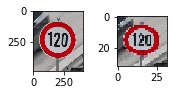

Web Image: 2


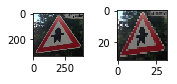

Web Image: 3


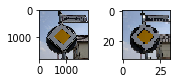

Web Image: 4


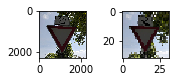

Web Image: 5


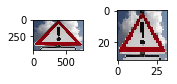

In [20]:
# test on images from web

# open pickle file for reading
fileObject = open('web.p','rb')  
# load object from file
img_vec = pickle.load(fileObject)
# close fileObject
fileObject.close()

X_web = np.zeros([5,image_shape[0],image_shape[1]])

# img_vec = []
print('Web Image: 1')
# Display the image
fig = plt.figure()
# fig.set_size_inches(18.5, 10.5)
# img_8 = plt.imread('./RWTS/image_8.jpg')
# img_vec.append(img_8)
img_8 = img_vec[0]
ax1 = fig.add_subplot(1,5,1)
ax1.imshow(img_8)
img_8 = cv2.resize(img_8, (32,32))
ax2 = fig.add_subplot(1,5,2)
ax2.imshow(img_8)
fig.tight_layout()
plt.show()

img_8 = cv2.cvtColor(img_8, cv2.COLOR_RGB2GRAY)
img_8 = clahe.apply(img_8)
X_web[0,:,:] = img_8


print('Web Image: 2')
# Display the image
fig = plt.figure()
# fig.set_size_inches(18.5, 10.5)
# img_11 = plt.imread('./RWTS/image_11.jpg')
# img_vec.append(img_11)
img_11 = img_vec[1]
ax1 = fig.add_subplot(1,5,1)
ax1.imshow(img_11)
img_11 = cv2.resize(img_11, (32,32))
ax2 = fig.add_subplot(1,5,2)
ax2.imshow(img_11)
fig.tight_layout()
plt.show()

img_11 = cv2.cvtColor(img_11, cv2.COLOR_RGB2GRAY)
img_11 = clahe.apply(img_11)
X_web[1,:,:] = img_11


print('Web Image: 3')
# Display the image
fig = plt.figure()
# fig.set_size_inches(18.5, 10.5)
# img_12 = plt.imread('./RWTS/image_12.jpg')
# img_vec.append(img_12)
img_12 = img_vec[2]
ax1 = fig.add_subplot(1,5,1)
ax1.imshow(img_12)
img_12 = cv2.resize(img_12, (32,32))
ax2 = fig.add_subplot(1,5,2)
ax2.imshow(img_12)

fig.tight_layout()
plt.show()

img_12 = cv2.cvtColor(img_12, cv2.COLOR_RGB2GRAY)
img_12 = clahe.apply(img_12)
X_web[2,:,:] = img_12


print('Web Image: 4')
# Display the image
fig = plt.figure()
# fig.set_size_inches(18.5, 10.5)
# img_13 = plt.imread('./RWTS/image_13.jpg')
# img_vec.append(img_13)
img_13 = img_vec[3]
ax1 = fig.add_subplot(1,5,1)
ax1.imshow(img_13)
img_13 = cv2.resize(img_13, (32,32))
ax2 = fig.add_subplot(1,5,2)
ax2.imshow(img_13)
fig.tight_layout()
plt.show()

img_13 = cv2.cvtColor(img_13, cv2.COLOR_RGB2GRAY)
img_13 = clahe.apply(img_13)
X_web[3,:,:] = img_13


print('Web Image: 5')
# Display the image
fig = plt.figure()
# fig.set_size_inches(18.5, 10.5)
# img_18 = plt.imread('./RWTS/image_18.jpg')
# img_vec.append(img_18)
img_18 = img_vec[4]
ax1 = fig.add_subplot(1,5,1)
ax1.imshow(img_18)
img_18 = cv2.resize(img_18, (32,32))
ax2 = fig.add_subplot(1,5,2)
ax2.imshow(img_18)
fig.tight_layout()
plt.show()

img_18 = cv2.cvtColor(img_18, cv2.COLOR_RGB2GRAY)
img_18 = clahe.apply(img_18)
X_web[4,:,:] = img_18

# # open file for writing
# fileObject = open('web.p','wb')
# pickle.dump(img_vec,fileObject) 
# # close fileObject
# fileObject.close()
    
y_web = np.array([8, 11, 12, 13, 18])



### Predict the Sign Type for Each Image

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [22]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [24]:
# convert color to grayscale, improves performance of convnet
# modify low contrast and brigthness images using Contrast Limited Adaptive Histogram Equalization (CLAHE).
# normalize 

# TODO: Number of training examples
n_web = np.shape(X_web)[0]

# training data set
Xg_web = np.zeros([n_web,image_shape[0],image_shape[1]])
Xn_web = np.zeros([n_web,image_shape[0],image_shape[1]])
ic = 0

# while (ic<1):
while (ic<n_web):

#     Xg_web_cur = cv2.cvtColor(X_web[ic,:,:,:], cv2.COLOR_RGB2GRAY)
#     Xg_web_cur = clahe.apply(Xg_web_cur)
    Xg_web_cur = X_web[ic,:,:]
    Xn_web[ic,:,:] = np.divide(Xg_web_cur,255)
    
#     # Display the image
#     fig = plt.figure()
#     # fig.set_size_inches(18.5, 10.5)
#     ax1 = fig.add_subplot(1,5,1)
#     ax1.imshow(Xg_web[ic,:,:], cmap="gray")    
#     ax2 = fig.add_subplot(1,5,2)
#     ax2.imshow(X_web[ic,:,:,:])    
    
    ic = ic+1
    
    
# web set
X_t1 = Xn_web-X_mu
# Normalized, data set
Xn_web = np.divide(X_t1,X_sig2)
    

In [25]:
# Set up logging for predictions
tensors_to_log = {"classes":"class_tensor", "probabilities":"softmax_tensor", "probs_ids":"st_ids"}

logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=(num_steps-1))


In [26]:
# Define the input function for web images
input_fn = tf.estimator.inputs.numpy_input_fn(x = {'img_nd': np.float32(Xn_web)}, 
                                              y = np.float32(y_web), 
                                              batch_size=batch_size, num_epochs=None, shuffle=False)

# Evaluate the Model
# estim_specs_web = model.predict(input_fn)
# estim_specs_web = model.evaluate(input_fn, steps=num_steps)
estim_specs_web = model.evaluate(input_fn, steps=num_steps, hooks=[logging_hook])

# print(estim_specs_web)
print(y_web)

INFO:tensorflow:Starting evaluation at 2019-05-27-13:52:57
INFO:tensorflow:Restoring parameters from /tmp/tmp6d9_ifq9/model.ckpt-4500
INFO:tensorflow:classes = [  8.  23.  12.  13.  18.   8.  23.  12.  13.  18.   8.  23.  12.  13.  18.
   8.  23.  12.  13.  18.   8.  23.  12.  13.  18.   8.  23.  12.  13.  18.
   8.  23.  12.  13.  18.   8.  23.  12.  13.  18.   8.  23.  12.  13.  18.
   8.  23.  12.  13.  18.   8.  23.  12.  13.  18.   8.  23.  12.  13.  18.
   8.  23.  12.  13.  18.   8.  23.  12.  13.  18.   8.  23.  12.  13.  18.
   8.  23.  12.  13.  18.   8.  23.  12.  13.  18.   8.  23.  12.  13.  18.
   8.  23.  12.  13.  18.   8.  23.  12.  13.  18.   8.  23.  12.  13.  18.
   8.  23.  12.  13.  18.   8.  23.  12.  13.  18.   8.  23.  12.  13.  18.
   8.  23.  12.  13.  18.], probabilities = [[ 0.73583531  0.12693515  0.10302792  0.02873528  0.00468364]
 [ 0.72406203  0.10525904  0.0806687   0.03459752  0.02059598]
 [ 1.          0.00000003  0.          0.          0.        ]

INFO:tensorflow:Evaluation [1/4500]
INFO:tensorflow:Evaluation [2/4500]
INFO:tensorflow:Evaluation [3/4500]
INFO:tensorflow:Evaluation [4/4500]
INFO:tensorflow:Evaluation [5/4500]
INFO:tensorflow:Evaluation [6/4500]
INFO:tensorflow:Evaluation [7/4500]
INFO:tensorflow:Evaluation [8/4500]
INFO:tensorflow:Evaluation [9/4500]
INFO:tensorflow:Evaluation [10/4500]
INFO:tensorflow:Evaluation [11/4500]
INFO:tensorflow:Evaluation [12/4500]
INFO:tensorflow:Evaluation [13/4500]
INFO:tensorflow:Evaluation [14/4500]
INFO:tensorflow:Evaluation [15/4500]
INFO:tensorflow:Evaluation [16/4500]
INFO:tensorflow:Evaluation [17/4500]
INFO:tensorflow:Evaluation [18/4500]
INFO:tensorflow:Evaluation [19/4500]
INFO:tensorflow:Evaluation [20/4500]
INFO:tensorflow:Evaluation [21/4500]
INFO:tensorflow:Evaluation [22/4500]
INFO:tensorflow:Evaluation [23/4500]
INFO:tensorflow:Evaluation [24/4500]
INFO:tensorflow:Evaluation [25/4500]
INFO:tensorflow:Evaluation [26/4500]
INFO:tensorflow:Evaluation [27/4500]
INFO:tenso

INFO:tensorflow:Evaluation [220/4500]
INFO:tensorflow:Evaluation [221/4500]
INFO:tensorflow:Evaluation [222/4500]
INFO:tensorflow:Evaluation [223/4500]
INFO:tensorflow:Evaluation [224/4500]
INFO:tensorflow:Evaluation [225/4500]
INFO:tensorflow:Evaluation [226/4500]
INFO:tensorflow:Evaluation [227/4500]
INFO:tensorflow:Evaluation [228/4500]
INFO:tensorflow:Evaluation [229/4500]
INFO:tensorflow:Evaluation [230/4500]
INFO:tensorflow:Evaluation [231/4500]
INFO:tensorflow:Evaluation [232/4500]
INFO:tensorflow:Evaluation [233/4500]
INFO:tensorflow:Evaluation [234/4500]
INFO:tensorflow:Evaluation [235/4500]
INFO:tensorflow:Evaluation [236/4500]
INFO:tensorflow:Evaluation [237/4500]
INFO:tensorflow:Evaluation [238/4500]
INFO:tensorflow:Evaluation [239/4500]
INFO:tensorflow:Evaluation [240/4500]
INFO:tensorflow:Evaluation [241/4500]
INFO:tensorflow:Evaluation [242/4500]
INFO:tensorflow:Evaluation [243/4500]
INFO:tensorflow:Evaluation [244/4500]
INFO:tensorflow:Evaluation [245/4500]
INFO:tensorf

INFO:tensorflow:Evaluation [436/4500]
INFO:tensorflow:Evaluation [437/4500]
INFO:tensorflow:Evaluation [438/4500]
INFO:tensorflow:Evaluation [439/4500]
INFO:tensorflow:Evaluation [440/4500]
INFO:tensorflow:Evaluation [441/4500]
INFO:tensorflow:Evaluation [442/4500]
INFO:tensorflow:Evaluation [443/4500]
INFO:tensorflow:Evaluation [444/4500]
INFO:tensorflow:Evaluation [445/4500]
INFO:tensorflow:Evaluation [446/4500]
INFO:tensorflow:Evaluation [447/4500]
INFO:tensorflow:Evaluation [448/4500]
INFO:tensorflow:Evaluation [449/4500]
INFO:tensorflow:Evaluation [450/4500]
INFO:tensorflow:Evaluation [451/4500]
INFO:tensorflow:Evaluation [452/4500]
INFO:tensorflow:Evaluation [453/4500]
INFO:tensorflow:Evaluation [454/4500]
INFO:tensorflow:Evaluation [455/4500]
INFO:tensorflow:Evaluation [456/4500]
INFO:tensorflow:Evaluation [457/4500]
INFO:tensorflow:Evaluation [458/4500]
INFO:tensorflow:Evaluation [459/4500]
INFO:tensorflow:Evaluation [460/4500]
INFO:tensorflow:Evaluation [461/4500]
INFO:tensorf

INFO:tensorflow:Evaluation [652/4500]
INFO:tensorflow:Evaluation [653/4500]
INFO:tensorflow:Evaluation [654/4500]
INFO:tensorflow:Evaluation [655/4500]
INFO:tensorflow:Evaluation [656/4500]
INFO:tensorflow:Evaluation [657/4500]
INFO:tensorflow:Evaluation [658/4500]
INFO:tensorflow:Evaluation [659/4500]
INFO:tensorflow:Evaluation [660/4500]
INFO:tensorflow:Evaluation [661/4500]
INFO:tensorflow:Evaluation [662/4500]
INFO:tensorflow:Evaluation [663/4500]
INFO:tensorflow:Evaluation [664/4500]
INFO:tensorflow:Evaluation [665/4500]
INFO:tensorflow:Evaluation [666/4500]
INFO:tensorflow:Evaluation [667/4500]
INFO:tensorflow:Evaluation [668/4500]
INFO:tensorflow:Evaluation [669/4500]
INFO:tensorflow:Evaluation [670/4500]
INFO:tensorflow:Evaluation [671/4500]
INFO:tensorflow:Evaluation [672/4500]
INFO:tensorflow:Evaluation [673/4500]
INFO:tensorflow:Evaluation [674/4500]
INFO:tensorflow:Evaluation [675/4500]
INFO:tensorflow:Evaluation [676/4500]
INFO:tensorflow:Evaluation [677/4500]
INFO:tensorf

INFO:tensorflow:Evaluation [868/4500]
INFO:tensorflow:Evaluation [869/4500]
INFO:tensorflow:Evaluation [870/4500]
INFO:tensorflow:Evaluation [871/4500]
INFO:tensorflow:Evaluation [872/4500]
INFO:tensorflow:Evaluation [873/4500]
INFO:tensorflow:Evaluation [874/4500]
INFO:tensorflow:Evaluation [875/4500]
INFO:tensorflow:Evaluation [876/4500]
INFO:tensorflow:Evaluation [877/4500]
INFO:tensorflow:Evaluation [878/4500]
INFO:tensorflow:Evaluation [879/4500]
INFO:tensorflow:Evaluation [880/4500]
INFO:tensorflow:Evaluation [881/4500]
INFO:tensorflow:Evaluation [882/4500]
INFO:tensorflow:Evaluation [883/4500]
INFO:tensorflow:Evaluation [884/4500]
INFO:tensorflow:Evaluation [885/4500]
INFO:tensorflow:Evaluation [886/4500]
INFO:tensorflow:Evaluation [887/4500]
INFO:tensorflow:Evaluation [888/4500]
INFO:tensorflow:Evaluation [889/4500]
INFO:tensorflow:Evaluation [890/4500]
INFO:tensorflow:Evaluation [891/4500]
INFO:tensorflow:Evaluation [892/4500]
INFO:tensorflow:Evaluation [893/4500]
INFO:tensorf

INFO:tensorflow:Evaluation [1082/4500]
INFO:tensorflow:Evaluation [1083/4500]
INFO:tensorflow:Evaluation [1084/4500]
INFO:tensorflow:Evaluation [1085/4500]
INFO:tensorflow:Evaluation [1086/4500]
INFO:tensorflow:Evaluation [1087/4500]
INFO:tensorflow:Evaluation [1088/4500]
INFO:tensorflow:Evaluation [1089/4500]
INFO:tensorflow:Evaluation [1090/4500]
INFO:tensorflow:Evaluation [1091/4500]
INFO:tensorflow:Evaluation [1092/4500]
INFO:tensorflow:Evaluation [1093/4500]
INFO:tensorflow:Evaluation [1094/4500]
INFO:tensorflow:Evaluation [1095/4500]
INFO:tensorflow:Evaluation [1096/4500]
INFO:tensorflow:Evaluation [1097/4500]
INFO:tensorflow:Evaluation [1098/4500]
INFO:tensorflow:Evaluation [1099/4500]
INFO:tensorflow:Evaluation [1100/4500]
INFO:tensorflow:Evaluation [1101/4500]
INFO:tensorflow:Evaluation [1102/4500]
INFO:tensorflow:Evaluation [1103/4500]
INFO:tensorflow:Evaluation [1104/4500]
INFO:tensorflow:Evaluation [1105/4500]
INFO:tensorflow:Evaluation [1106/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1293/4500]
INFO:tensorflow:Evaluation [1294/4500]
INFO:tensorflow:Evaluation [1295/4500]
INFO:tensorflow:Evaluation [1296/4500]
INFO:tensorflow:Evaluation [1297/4500]
INFO:tensorflow:Evaluation [1298/4500]
INFO:tensorflow:Evaluation [1299/4500]
INFO:tensorflow:Evaluation [1300/4500]
INFO:tensorflow:Evaluation [1301/4500]
INFO:tensorflow:Evaluation [1302/4500]
INFO:tensorflow:Evaluation [1303/4500]
INFO:tensorflow:Evaluation [1304/4500]
INFO:tensorflow:Evaluation [1305/4500]
INFO:tensorflow:Evaluation [1306/4500]
INFO:tensorflow:Evaluation [1307/4500]
INFO:tensorflow:Evaluation [1308/4500]
INFO:tensorflow:Evaluation [1309/4500]
INFO:tensorflow:Evaluation [1310/4500]
INFO:tensorflow:Evaluation [1311/4500]
INFO:tensorflow:Evaluation [1312/4500]
INFO:tensorflow:Evaluation [1313/4500]
INFO:tensorflow:Evaluation [1314/4500]
INFO:tensorflow:Evaluation [1315/4500]
INFO:tensorflow:Evaluation [1316/4500]
INFO:tensorflow:Evaluation [1317/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1504/4500]
INFO:tensorflow:Evaluation [1505/4500]
INFO:tensorflow:Evaluation [1506/4500]
INFO:tensorflow:Evaluation [1507/4500]
INFO:tensorflow:Evaluation [1508/4500]
INFO:tensorflow:Evaluation [1509/4500]
INFO:tensorflow:Evaluation [1510/4500]
INFO:tensorflow:Evaluation [1511/4500]
INFO:tensorflow:Evaluation [1512/4500]
INFO:tensorflow:Evaluation [1513/4500]
INFO:tensorflow:Evaluation [1514/4500]
INFO:tensorflow:Evaluation [1515/4500]
INFO:tensorflow:Evaluation [1516/4500]
INFO:tensorflow:Evaluation [1517/4500]
INFO:tensorflow:Evaluation [1518/4500]
INFO:tensorflow:Evaluation [1519/4500]
INFO:tensorflow:Evaluation [1520/4500]
INFO:tensorflow:Evaluation [1521/4500]
INFO:tensorflow:Evaluation [1522/4500]
INFO:tensorflow:Evaluation [1523/4500]
INFO:tensorflow:Evaluation [1524/4500]
INFO:tensorflow:Evaluation [1525/4500]
INFO:tensorflow:Evaluation [1526/4500]
INFO:tensorflow:Evaluation [1527/4500]
INFO:tensorflow:Evaluation [1528/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1715/4500]
INFO:tensorflow:Evaluation [1716/4500]
INFO:tensorflow:Evaluation [1717/4500]
INFO:tensorflow:Evaluation [1718/4500]
INFO:tensorflow:Evaluation [1719/4500]
INFO:tensorflow:Evaluation [1720/4500]
INFO:tensorflow:Evaluation [1721/4500]
INFO:tensorflow:Evaluation [1722/4500]
INFO:tensorflow:Evaluation [1723/4500]
INFO:tensorflow:Evaluation [1724/4500]
INFO:tensorflow:Evaluation [1725/4500]
INFO:tensorflow:Evaluation [1726/4500]
INFO:tensorflow:Evaluation [1727/4500]
INFO:tensorflow:Evaluation [1728/4500]
INFO:tensorflow:Evaluation [1729/4500]
INFO:tensorflow:Evaluation [1730/4500]
INFO:tensorflow:Evaluation [1731/4500]
INFO:tensorflow:Evaluation [1732/4500]
INFO:tensorflow:Evaluation [1733/4500]
INFO:tensorflow:Evaluation [1734/4500]
INFO:tensorflow:Evaluation [1735/4500]
INFO:tensorflow:Evaluation [1736/4500]
INFO:tensorflow:Evaluation [1737/4500]
INFO:tensorflow:Evaluation [1738/4500]
INFO:tensorflow:Evaluation [1739/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1926/4500]
INFO:tensorflow:Evaluation [1927/4500]
INFO:tensorflow:Evaluation [1928/4500]
INFO:tensorflow:Evaluation [1929/4500]
INFO:tensorflow:Evaluation [1930/4500]
INFO:tensorflow:Evaluation [1931/4500]
INFO:tensorflow:Evaluation [1932/4500]
INFO:tensorflow:Evaluation [1933/4500]
INFO:tensorflow:Evaluation [1934/4500]
INFO:tensorflow:Evaluation [1935/4500]
INFO:tensorflow:Evaluation [1936/4500]
INFO:tensorflow:Evaluation [1937/4500]
INFO:tensorflow:Evaluation [1938/4500]
INFO:tensorflow:Evaluation [1939/4500]
INFO:tensorflow:Evaluation [1940/4500]
INFO:tensorflow:Evaluation [1941/4500]
INFO:tensorflow:Evaluation [1942/4500]
INFO:tensorflow:Evaluation [1943/4500]
INFO:tensorflow:Evaluation [1944/4500]
INFO:tensorflow:Evaluation [1945/4500]
INFO:tensorflow:Evaluation [1946/4500]
INFO:tensorflow:Evaluation [1947/4500]
INFO:tensorflow:Evaluation [1948/4500]
INFO:tensorflow:Evaluation [1949/4500]
INFO:tensorflow:Evaluation [1950/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [2137/4500]
INFO:tensorflow:Evaluation [2138/4500]
INFO:tensorflow:Evaluation [2139/4500]
INFO:tensorflow:Evaluation [2140/4500]
INFO:tensorflow:Evaluation [2141/4500]
INFO:tensorflow:Evaluation [2142/4500]
INFO:tensorflow:Evaluation [2143/4500]
INFO:tensorflow:Evaluation [2144/4500]
INFO:tensorflow:Evaluation [2145/4500]
INFO:tensorflow:Evaluation [2146/4500]
INFO:tensorflow:Evaluation [2147/4500]
INFO:tensorflow:Evaluation [2148/4500]
INFO:tensorflow:Evaluation [2149/4500]
INFO:tensorflow:Evaluation [2150/4500]
INFO:tensorflow:Evaluation [2151/4500]
INFO:tensorflow:Evaluation [2152/4500]
INFO:tensorflow:Evaluation [2153/4500]
INFO:tensorflow:Evaluation [2154/4500]
INFO:tensorflow:Evaluation [2155/4500]
INFO:tensorflow:Evaluation [2156/4500]
INFO:tensorflow:Evaluation [2157/4500]
INFO:tensorflow:Evaluation [2158/4500]
INFO:tensorflow:Evaluation [2159/4500]
INFO:tensorflow:Evaluation [2160/4500]
INFO:tensorflow:Evaluation [2161/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [2348/4500]
INFO:tensorflow:Evaluation [2349/4500]
INFO:tensorflow:Evaluation [2350/4500]
INFO:tensorflow:Evaluation [2351/4500]
INFO:tensorflow:Evaluation [2352/4500]
INFO:tensorflow:Evaluation [2353/4500]
INFO:tensorflow:Evaluation [2354/4500]
INFO:tensorflow:Evaluation [2355/4500]
INFO:tensorflow:Evaluation [2356/4500]
INFO:tensorflow:Evaluation [2357/4500]
INFO:tensorflow:Evaluation [2358/4500]
INFO:tensorflow:Evaluation [2359/4500]
INFO:tensorflow:Evaluation [2360/4500]
INFO:tensorflow:Evaluation [2361/4500]
INFO:tensorflow:Evaluation [2362/4500]
INFO:tensorflow:Evaluation [2363/4500]
INFO:tensorflow:Evaluation [2364/4500]
INFO:tensorflow:Evaluation [2365/4500]
INFO:tensorflow:Evaluation [2366/4500]
INFO:tensorflow:Evaluation [2367/4500]
INFO:tensorflow:Evaluation [2368/4500]
INFO:tensorflow:Evaluation [2369/4500]
INFO:tensorflow:Evaluation [2370/4500]
INFO:tensorflow:Evaluation [2371/4500]
INFO:tensorflow:Evaluation [2372/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [2559/4500]
INFO:tensorflow:Evaluation [2560/4500]
INFO:tensorflow:Evaluation [2561/4500]
INFO:tensorflow:Evaluation [2562/4500]
INFO:tensorflow:Evaluation [2563/4500]
INFO:tensorflow:Evaluation [2564/4500]
INFO:tensorflow:Evaluation [2565/4500]
INFO:tensorflow:Evaluation [2566/4500]
INFO:tensorflow:Evaluation [2567/4500]
INFO:tensorflow:Evaluation [2568/4500]
INFO:tensorflow:Evaluation [2569/4500]
INFO:tensorflow:Evaluation [2570/4500]
INFO:tensorflow:Evaluation [2571/4500]
INFO:tensorflow:Evaluation [2572/4500]
INFO:tensorflow:Evaluation [2573/4500]
INFO:tensorflow:Evaluation [2574/4500]
INFO:tensorflow:Evaluation [2575/4500]
INFO:tensorflow:Evaluation [2576/4500]
INFO:tensorflow:Evaluation [2577/4500]
INFO:tensorflow:Evaluation [2578/4500]
INFO:tensorflow:Evaluation [2579/4500]
INFO:tensorflow:Evaluation [2580/4500]
INFO:tensorflow:Evaluation [2581/4500]
INFO:tensorflow:Evaluation [2582/4500]
INFO:tensorflow:Evaluation [2583/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [2770/4500]
INFO:tensorflow:Evaluation [2771/4500]
INFO:tensorflow:Evaluation [2772/4500]
INFO:tensorflow:Evaluation [2773/4500]
INFO:tensorflow:Evaluation [2774/4500]
INFO:tensorflow:Evaluation [2775/4500]
INFO:tensorflow:Evaluation [2776/4500]
INFO:tensorflow:Evaluation [2777/4500]
INFO:tensorflow:Evaluation [2778/4500]
INFO:tensorflow:Evaluation [2779/4500]
INFO:tensorflow:Evaluation [2780/4500]
INFO:tensorflow:Evaluation [2781/4500]
INFO:tensorflow:Evaluation [2782/4500]
INFO:tensorflow:Evaluation [2783/4500]
INFO:tensorflow:Evaluation [2784/4500]
INFO:tensorflow:Evaluation [2785/4500]
INFO:tensorflow:Evaluation [2786/4500]
INFO:tensorflow:Evaluation [2787/4500]
INFO:tensorflow:Evaluation [2788/4500]
INFO:tensorflow:Evaluation [2789/4500]
INFO:tensorflow:Evaluation [2790/4500]
INFO:tensorflow:Evaluation [2791/4500]
INFO:tensorflow:Evaluation [2792/4500]
INFO:tensorflow:Evaluation [2793/4500]
INFO:tensorflow:Evaluation [2794/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [2981/4500]
INFO:tensorflow:Evaluation [2982/4500]
INFO:tensorflow:Evaluation [2983/4500]
INFO:tensorflow:Evaluation [2984/4500]
INFO:tensorflow:Evaluation [2985/4500]
INFO:tensorflow:Evaluation [2986/4500]
INFO:tensorflow:Evaluation [2987/4500]
INFO:tensorflow:Evaluation [2988/4500]
INFO:tensorflow:Evaluation [2989/4500]
INFO:tensorflow:Evaluation [2990/4500]
INFO:tensorflow:Evaluation [2991/4500]
INFO:tensorflow:Evaluation [2992/4500]
INFO:tensorflow:Evaluation [2993/4500]
INFO:tensorflow:Evaluation [2994/4500]
INFO:tensorflow:Evaluation [2995/4500]
INFO:tensorflow:Evaluation [2996/4500]
INFO:tensorflow:Evaluation [2997/4500]
INFO:tensorflow:Evaluation [2998/4500]
INFO:tensorflow:Evaluation [2999/4500]
INFO:tensorflow:Evaluation [3000/4500]
INFO:tensorflow:Evaluation [3001/4500]
INFO:tensorflow:Evaluation [3002/4500]
INFO:tensorflow:Evaluation [3003/4500]
INFO:tensorflow:Evaluation [3004/4500]
INFO:tensorflow:Evaluation [3005/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [3192/4500]
INFO:tensorflow:Evaluation [3193/4500]
INFO:tensorflow:Evaluation [3194/4500]
INFO:tensorflow:Evaluation [3195/4500]
INFO:tensorflow:Evaluation [3196/4500]
INFO:tensorflow:Evaluation [3197/4500]
INFO:tensorflow:Evaluation [3198/4500]
INFO:tensorflow:Evaluation [3199/4500]
INFO:tensorflow:Evaluation [3200/4500]
INFO:tensorflow:Evaluation [3201/4500]
INFO:tensorflow:Evaluation [3202/4500]
INFO:tensorflow:Evaluation [3203/4500]
INFO:tensorflow:Evaluation [3204/4500]
INFO:tensorflow:Evaluation [3205/4500]
INFO:tensorflow:Evaluation [3206/4500]
INFO:tensorflow:Evaluation [3207/4500]
INFO:tensorflow:Evaluation [3208/4500]
INFO:tensorflow:Evaluation [3209/4500]
INFO:tensorflow:Evaluation [3210/4500]
INFO:tensorflow:Evaluation [3211/4500]
INFO:tensorflow:Evaluation [3212/4500]
INFO:tensorflow:Evaluation [3213/4500]
INFO:tensorflow:Evaluation [3214/4500]
INFO:tensorflow:Evaluation [3215/4500]
INFO:tensorflow:Evaluation [3216/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [3403/4500]
INFO:tensorflow:Evaluation [3404/4500]
INFO:tensorflow:Evaluation [3405/4500]
INFO:tensorflow:Evaluation [3406/4500]
INFO:tensorflow:Evaluation [3407/4500]
INFO:tensorflow:Evaluation [3408/4500]
INFO:tensorflow:Evaluation [3409/4500]
INFO:tensorflow:Evaluation [3410/4500]
INFO:tensorflow:Evaluation [3411/4500]
INFO:tensorflow:Evaluation [3412/4500]
INFO:tensorflow:Evaluation [3413/4500]
INFO:tensorflow:Evaluation [3414/4500]
INFO:tensorflow:Evaluation [3415/4500]
INFO:tensorflow:Evaluation [3416/4500]
INFO:tensorflow:Evaluation [3417/4500]
INFO:tensorflow:Evaluation [3418/4500]
INFO:tensorflow:Evaluation [3419/4500]
INFO:tensorflow:Evaluation [3420/4500]
INFO:tensorflow:Evaluation [3421/4500]
INFO:tensorflow:Evaluation [3422/4500]
INFO:tensorflow:Evaluation [3423/4500]
INFO:tensorflow:Evaluation [3424/4500]
INFO:tensorflow:Evaluation [3425/4500]
INFO:tensorflow:Evaluation [3426/4500]
INFO:tensorflow:Evaluation [3427/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [3614/4500]
INFO:tensorflow:Evaluation [3615/4500]
INFO:tensorflow:Evaluation [3616/4500]
INFO:tensorflow:Evaluation [3617/4500]
INFO:tensorflow:Evaluation [3618/4500]
INFO:tensorflow:Evaluation [3619/4500]
INFO:tensorflow:Evaluation [3620/4500]
INFO:tensorflow:Evaluation [3621/4500]
INFO:tensorflow:Evaluation [3622/4500]
INFO:tensorflow:Evaluation [3623/4500]
INFO:tensorflow:Evaluation [3624/4500]
INFO:tensorflow:Evaluation [3625/4500]
INFO:tensorflow:Evaluation [3626/4500]
INFO:tensorflow:Evaluation [3627/4500]
INFO:tensorflow:Evaluation [3628/4500]
INFO:tensorflow:Evaluation [3629/4500]
INFO:tensorflow:Evaluation [3630/4500]
INFO:tensorflow:Evaluation [3631/4500]
INFO:tensorflow:Evaluation [3632/4500]
INFO:tensorflow:Evaluation [3633/4500]
INFO:tensorflow:Evaluation [3634/4500]
INFO:tensorflow:Evaluation [3635/4500]
INFO:tensorflow:Evaluation [3636/4500]
INFO:tensorflow:Evaluation [3637/4500]
INFO:tensorflow:Evaluation [3638/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [3825/4500]
INFO:tensorflow:Evaluation [3826/4500]
INFO:tensorflow:Evaluation [3827/4500]
INFO:tensorflow:Evaluation [3828/4500]
INFO:tensorflow:Evaluation [3829/4500]
INFO:tensorflow:Evaluation [3830/4500]
INFO:tensorflow:Evaluation [3831/4500]
INFO:tensorflow:Evaluation [3832/4500]
INFO:tensorflow:Evaluation [3833/4500]
INFO:tensorflow:Evaluation [3834/4500]
INFO:tensorflow:Evaluation [3835/4500]
INFO:tensorflow:Evaluation [3836/4500]
INFO:tensorflow:Evaluation [3837/4500]
INFO:tensorflow:Evaluation [3838/4500]
INFO:tensorflow:Evaluation [3839/4500]
INFO:tensorflow:Evaluation [3840/4500]
INFO:tensorflow:Evaluation [3841/4500]
INFO:tensorflow:Evaluation [3842/4500]
INFO:tensorflow:Evaluation [3843/4500]
INFO:tensorflow:Evaluation [3844/4500]
INFO:tensorflow:Evaluation [3845/4500]
INFO:tensorflow:Evaluation [3846/4500]
INFO:tensorflow:Evaluation [3847/4500]
INFO:tensorflow:Evaluation [3848/4500]
INFO:tensorflow:Evaluation [3849/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [4036/4500]
INFO:tensorflow:Evaluation [4037/4500]
INFO:tensorflow:Evaluation [4038/4500]
INFO:tensorflow:Evaluation [4039/4500]
INFO:tensorflow:Evaluation [4040/4500]
INFO:tensorflow:Evaluation [4041/4500]
INFO:tensorflow:Evaluation [4042/4500]
INFO:tensorflow:Evaluation [4043/4500]
INFO:tensorflow:Evaluation [4044/4500]
INFO:tensorflow:Evaluation [4045/4500]
INFO:tensorflow:Evaluation [4046/4500]
INFO:tensorflow:Evaluation [4047/4500]
INFO:tensorflow:Evaluation [4048/4500]
INFO:tensorflow:Evaluation [4049/4500]
INFO:tensorflow:Evaluation [4050/4500]
INFO:tensorflow:Evaluation [4051/4500]
INFO:tensorflow:Evaluation [4052/4500]
INFO:tensorflow:Evaluation [4053/4500]
INFO:tensorflow:Evaluation [4054/4500]
INFO:tensorflow:Evaluation [4055/4500]
INFO:tensorflow:Evaluation [4056/4500]
INFO:tensorflow:Evaluation [4057/4500]
INFO:tensorflow:Evaluation [4058/4500]
INFO:tensorflow:Evaluation [4059/4500]
INFO:tensorflow:Evaluation [4060/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [4247/4500]
INFO:tensorflow:Evaluation [4248/4500]
INFO:tensorflow:Evaluation [4249/4500]
INFO:tensorflow:Evaluation [4250/4500]
INFO:tensorflow:Evaluation [4251/4500]
INFO:tensorflow:Evaluation [4252/4500]
INFO:tensorflow:Evaluation [4253/4500]
INFO:tensorflow:Evaluation [4254/4500]
INFO:tensorflow:Evaluation [4255/4500]
INFO:tensorflow:Evaluation [4256/4500]
INFO:tensorflow:Evaluation [4257/4500]
INFO:tensorflow:Evaluation [4258/4500]
INFO:tensorflow:Evaluation [4259/4500]
INFO:tensorflow:Evaluation [4260/4500]
INFO:tensorflow:Evaluation [4261/4500]
INFO:tensorflow:Evaluation [4262/4500]
INFO:tensorflow:Evaluation [4263/4500]
INFO:tensorflow:Evaluation [4264/4500]
INFO:tensorflow:Evaluation [4265/4500]
INFO:tensorflow:Evaluation [4266/4500]
INFO:tensorflow:Evaluation [4267/4500]
INFO:tensorflow:Evaluation [4268/4500]
INFO:tensorflow:Evaluation [4269/4500]
INFO:tensorflow:Evaluation [4270/4500]
INFO:tensorflow:Evaluation [4271/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [4458/4500]
INFO:tensorflow:Evaluation [4459/4500]
INFO:tensorflow:Evaluation [4460/4500]
INFO:tensorflow:Evaluation [4461/4500]
INFO:tensorflow:Evaluation [4462/4500]
INFO:tensorflow:Evaluation [4463/4500]
INFO:tensorflow:Evaluation [4464/4500]
INFO:tensorflow:Evaluation [4465/4500]
INFO:tensorflow:Evaluation [4466/4500]
INFO:tensorflow:Evaluation [4467/4500]
INFO:tensorflow:Evaluation [4468/4500]
INFO:tensorflow:Evaluation [4469/4500]
INFO:tensorflow:Evaluation [4470/4500]
INFO:tensorflow:Evaluation [4471/4500]
INFO:tensorflow:Evaluation [4472/4500]
INFO:tensorflow:Evaluation [4473/4500]
INFO:tensorflow:Evaluation [4474/4500]
INFO:tensorflow:Evaluation [4475/4500]
INFO:tensorflow:Evaluation [4476/4500]
INFO:tensorflow:Evaluation [4477/4500]
INFO:tensorflow:Evaluation [4478/4500]
INFO:tensorflow:Evaluation [4479/4500]
INFO:tensorflow:Evaluation [4480/4500]
INFO:tensorflow:Evaluation [4481/4500]
INFO:tensorflow:Evaluation [4482/4500]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [4500/4500]
INFO:tensorflow:Finished evaluation at 2019-05-27-13:53:29
INFO:tensorflow:Saving dict for global step 4500: accuracy = 0.8, global_step = 4500, loss = 1.3172
[ 8 11 12 13 18]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [27]:
# ### Visualize your network's feature maps here.
# ### Feel free to use as many code cells as needed.

# # image_input: the test image being fed into the network to produce the feature maps
# # tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# # activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# # plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

# def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
#     # Here make sure to preprocess your image_input in a way your network expects
#     # with size, normalization, ect if needed
#     # image_input =
#     # Note: x should be the same name as your network's tensorflow data placeholder variable
#     # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
#     activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
#     featuremaps = activation.shape[3]
#     plt.figure(plt_num, figsize=(15,15))
#     for featuremap in range(featuremaps):
#         plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
#         plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
#         if activation_min != -1 & activation_max != -1:
#             plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
#         elif activation_max != -1:
#             plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
#         elif activation_min !=-1:
#             plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
#         else:
#             plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")